# Home Credit Default Risk (HCDR)

The course project is based on the [Home Credit Default Risk (HCDR)  Kaggle Competition](https://www.kaggle.com/c/home-credit-default-risk/). The goal of this project is to predict whether or not a client will repay a loan. In order to make sure that people who struggle to get loans due to insufficient or non-existent credit histories have a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.


## Some of the challenges

1. Dataset size 
   * (688 meg uncompressed) with millions of rows of data
   * 2.71 Gig of data uncompressed
* Dealing with missing data
* Imbalanced datasets
* Summarizing transaction data


# Kaggle API setup
Kaggle is a Data Science Competition Platform which shares a lot of datasets. In the past, it was troublesome to submit your result as your have to go through the console in your browser and drag your files there. Now you can interact with Kaggle via the command line. E.g., 

```bash
! kaggle competitions files home-credit-default-risk
```

It is quite easy to setup, it takes me less than 15 minutes to finish a submission.

1. Install library
* Create a API Token (edit your profile on [Kaggle.com](https://www.kaggle.com/)); this produces `kaggle.json` file
* Put your JSON `kaggle.json` in the right place
* Access competition files; make submissions via the command (see examples below)
* Submit result

For more detailed information on setting the Kaggle API see [here](https://medium.com/@nokkk/make-your-kaggle-submissions-with-kaggle-official-api-f49093c04f8a) and [here](https://github.com/Kaggle/kaggle-api).



In [1]:
!pip install kaggle

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [2]:
!pwd


/N/home/u080/sbipink/Carbonate/I526_AML_Student/Assignments/Unit-Project-Home-Credit-Default-Risk/HCDR_Phase_1_baseline_submission


In [3]:
!mkdir ~/.kaggle
!cp /N/home/u080/sbipink/Carbonate/Downloads/kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory '/N/u/sbipink/Carbonate/.kaggle': File exists


In [4]:
! kaggle competitions files home-credit-default-risk

name                                 size  creationDate         
----------------------------------  -----  -------------------  
application_train.csv               158MB  2019-12-11 02:55:35  
application_test.csv                 25MB  2019-12-11 02:55:35  
bureau.csv                          162MB  2019-12-11 02:55:35  
previous_application.csv            386MB  2019-12-11 02:55:35  
POS_CASH_balance.csv                375MB  2019-12-11 02:55:35  
installments_payments.csv           690MB  2019-12-11 02:55:35  
sample_submission.csv               524KB  2019-12-11 02:55:35  
credit_card_balance.csv             405MB  2019-12-11 02:55:35  
HomeCredit_columns_description.csv   37KB  2019-12-11 02:55:35  
bureau_balance.csv                  358MB  2019-12-11 02:55:35  


# Dataset and how to download


## Back ground Home Credit Group

Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

### Home Credit Group

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.


## Background on the dataset
Home Credit is a non-banking financial institution, founded in 1997 in the Czech Republic.

The company operates in 14 countries (including United States, Russia, Kazahstan, Belarus, China, India) and focuses on lending primarily to people with little or no credit history which will either not obtain loans or became victims of untrustworthly lenders.

Home Credit group has over 29 million customers, total assests of 21 billions Euro, over 160 millions loans, with the majority in Asia and and almost half of them in China (as of 19-05-2018).

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

## Data files overview
There are 7 different sources of data:

* __application_train/application_test:__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.
* __bureau:__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance:__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application:__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE:__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment:__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.

In [ ]:
# ![alt](home_credit.png "Home credit")

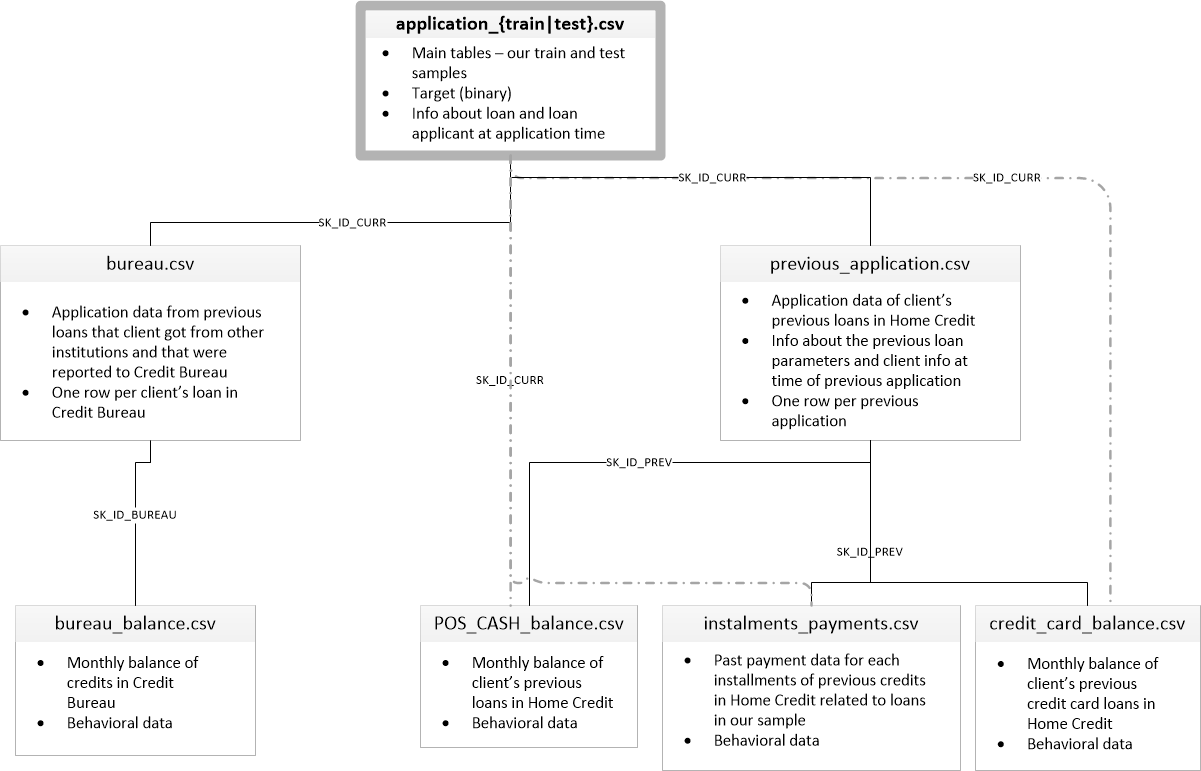

## Downloading the files via Kaggle API

Create a base directory:

```bash
DATA_DIR = "../../../Data/home-credit-default-risk"   #same level as course repo in the data directory
```

Please download the project data files and data dictionary and unzip them using either of the following approaches:

1. Click on the `Download` button on the following [Data Webpage](https://www.kaggle.com/c/home-credit-default-risk/data) and unzip the  zip file to the `BASE_DIR`
2. If you plan to use the Kaggle API, please use the following steps.


In [5]:
DATA_DIR = "/N/home/u080/sbipink/Carbonate/I526_AML_Student/Data/home-credit-default-risk"   #same level as course repo in the data directory
#DATA_DIR = os.path.join('./ddddd/')
!mkdir $DATA_DIR

mkdir: cannot create directory '/N/home/u080/sbipink/Carbonate/I526_AML_Student/Data/home-credit-default-risk': File exists


In [6]:
!ls -l $DATA_DIR

total 3326880
-rw-rw-r-- 1 sbipink sbipink     37383 Nov 15 16:21 HomeCredit_columns_description.csv
-rw-rw-r-- 1 sbipink sbipink 392703158 Nov 15 16:21 POS_CASH_balance.csv
-rw-rw-r-- 1 sbipink sbipink  26567651 Nov 15 16:21 application_test.csv
-rw-rw-r-- 1 sbipink sbipink 166133370 Nov 15 16:21 application_train.csv
-rw-rw-r-- 1 sbipink sbipink 170016717 Nov 15 16:21 bureau.csv
-rw-rw-r-- 1 sbipink sbipink 375592889 Nov 15 16:21 bureau_balance.csv
-rw-rw-r-- 1 sbipink sbipink 424582605 Nov 15 16:21 credit_card_balance.csv
drwxrwxr-x 2 sbipink sbipink     32768 Nov 15 16:21 home-credit-default-risk
-rw-r--r-- 1 sbipink sbipink 721616255 Nov 15 16:21 home-credit-default-risk.zip
-rw-rw-r-- 1 sbipink sbipink 723118349 Nov 15 16:21 installments_payments.csv
-rw-rw-r-- 1 sbipink sbipink 404973293 Nov 15 16:22 previous_application.csv
-rw-rw-r-- 1 sbipink sbipink    536202 Nov 15 16:22 sample_submission.csv


In [7]:
! kaggle competitions download home-credit-default-risk -p $DATA_DIR

home-credit-default-risk.zip: Skipping, found more recently modified local copy (use --force to force download)


### Imports

In [8]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')


In [9]:
unzippingReq = False
if unzippingReq: #please modify this code 
    zip_ref = zipfile.ZipFile('application_train.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('application_test.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('bureau_balance.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('bureau.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('credit_card_balance.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('installments_payments.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('POS_CASH_balance.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('previous_application.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()

## Data files overview
### Data Dictionary

As part of the data download comes a  Data Dictionary. It named `HomeCredit_columns_description.csv`

### Application train

In [10]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

def load_data(in_path, name):
    df = pd.read_csv(in_path)
    print(f"{name}: shape is {df.shape}")
    print(df.info())
    display(df.head(5))
    return df

datasets={}  # lets store the datasets in a dictionary so we can keep track of them easily
ds_name = 'application_train'
datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)

datasets['application_train'].shape

application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


(307511, 122)

### Application test


* __application_train/application_test:__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.


In [11]:
ds_name = 'application_test'
datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)

application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


The application dataset has the most information about the client: Gender, income, family status, education ...

### The Other datasets

* __bureau:__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance:__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application:__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE:__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment:__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.

In [12]:
%%time
ds_names = ("application_train", "application_test", "bureau","bureau_balance","credit_card_balance","installments_payments",
            "previous_application","POS_CASH_balance")

for ds_name in ds_names:
    datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)


application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


bureau: shape is (1716428, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB
None


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


bureau_balance: shape is (27299925, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB
None


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


credit_card_balance: shape is (3840312, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_C

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


installments_payments: shape is (13605401, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB
None


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


previous_application: shape is (1670214, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 1

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


POS_CASH_balance: shape is (10001358, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB
None


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


CPU times: user 39.3 s, sys: 4.82 s, total: 44.2 s
Wall time: 44.4 s


# Exploratory Data Analysis

## Summary of Entire dataset

In [13]:
print('\033[1m' + "Size of each dataset : " + '\033[0m' , end = '\n' * 1)
for ds_name in datasets.keys():
    print(f'dataset {ds_name:25}: [ {datasets[ds_name].shape[0],}, {datasets[ds_name].shape[1]}]')

Size of each dataset : 
dataset application_train        : [ (307511,), 122]
dataset application_test         : [ (48744,), 121]
dataset bureau                   : [ (1716428,), 17]
dataset bureau_balance           : [ (27299925,), 3]
dataset credit_card_balance      : [ (3840312,), 23]
dataset installments_payments    : [ (13605401,), 8]
dataset previous_application     : [ (1670214,), 37]
dataset POS_CASH_balance         : [ (10001358,), 8]


## Summary of Application train

In [14]:
datasets["application_train"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [15]:
datasets["application_train"].describe() #numerical only features

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [16]:
datasets["application_test"].describe() #numerical only features

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,...,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,...,0.001559,0.0,0.0,0.0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,103169.547296,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,0.014428,4325.900393,144348.507136,3552.612035,...,0.039456,0.0,0.0,0.0,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873
min,100001.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,0.000253,-25195.000000,-17463.000000,-23722.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188557.750000,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,0.010006,-19637.000000,-2910.000000,-7459.250000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277549.000000,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,0.018850,-15785.000000,-1293.000000,-4490.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,367555.500000,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,0.028663,-12496.000000,-296.000000,-1901.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,456250.000000,20.000000,4.410000e+06,2.245500e+06,180576.000000,2.245500e+06,0.072508,-7338.000000,365243.000000,0.000000,...,1.000000,0.0,0.0,0.0,2.000000,2.000000,2.000000,6.000000,7.000000,17.000000


In [17]:
datasets["application_train"].describe(include='all') #look at all categorical and numerical

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511,307511,307511,307511,307511.000000,3.075110e+05,3.075110e+05,307499.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,278232,202448,202924,213312,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,278180.518577,0.080729,NaN,NaN,NaN,NaN,0.417052,1.687979e+05,5.990260e+05,27108.573909,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,NaN,NaN,NaN,NaN,0.722121,2.371231e+05,4.024908e+05,14493.737315,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,2.565000e+04,4.500000e+04,1615.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.125000e+05,2.700000e+05,16524.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.471500e+05,5.135310e+05,24903.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,NaN,NaN,NaN,NaN,1.000000,2.025000e+05,8.086500e+05,34596.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000


## Missing data for application train

In [18]:
percent = (datasets["application_train"].isnull().sum()/datasets["application_train"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["application_train"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Train Missing Count"])
missing_application_train_data.head(20)

,Percent,Train Missing Count
COMMONAREA_MEDI,69.87,214865
COMMONAREA_AVG,69.87,214865
COMMONAREA_MODE,69.87,214865
NONLIVINGAPARTMENTS_MODE,69.43,213514
NONLIVINGAPARTMENTS_AVG,69.43,213514
NONLIVINGAPARTMENTS_MEDI,69.43,213514
FONDKAPREMONT_MODE,68.39,210295
LIVINGAPARTMENTS_MODE,68.35,210199
LIVINGAPARTMENTS_AVG,68.35,210199
LIVINGAPARTMENTS_MEDI,68.35,210199


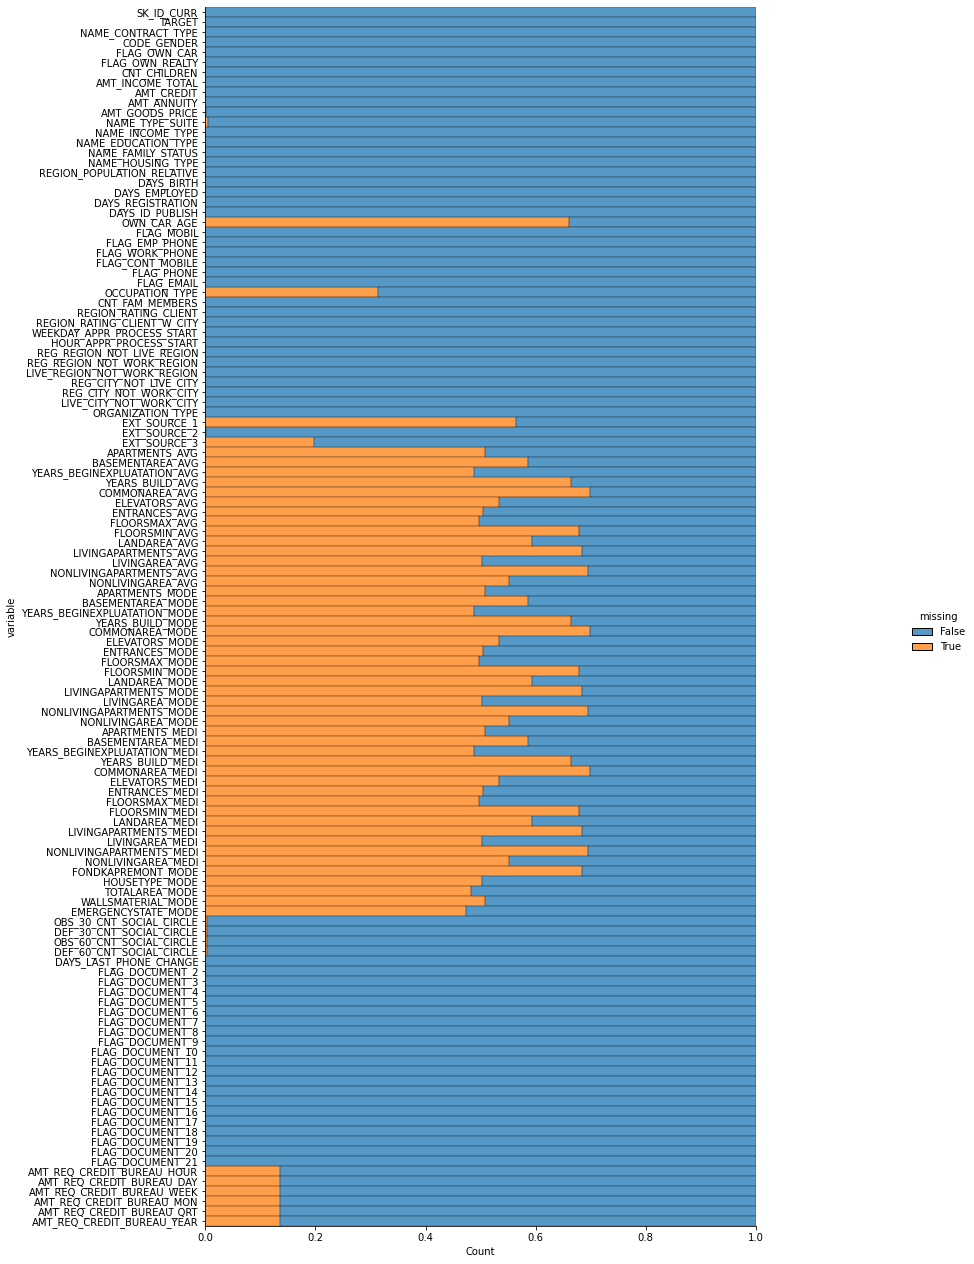

In [19]:
def plot_missing_data(df, x, y):
    g = sns.displot(
        data=datasets[df].isna().melt(value_name="missing"),
        y="variable",
        hue="missing",
        multiple="fill",
        aspect=1.25
    )
    g.fig.set_figwidth(x)
    g.fig.set_figheight(y)
plot_missing_data("application_train",18,20)  

In [20]:
percent = (datasets["application_test"].isnull().sum()/datasets["application_test"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["application_test"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Test Missing Count"])
missing_application_train_data.head(20)

,Percent,Test Missing Count
COMMONAREA_AVG,68.72,33495
COMMONAREA_MODE,68.72,33495
COMMONAREA_MEDI,68.72,33495
NONLIVINGAPARTMENTS_AVG,68.41,33347
NONLIVINGAPARTMENTS_MODE,68.41,33347
NONLIVINGAPARTMENTS_MEDI,68.41,33347
FONDKAPREMONT_MODE,67.28,32797
LIVINGAPARTMENTS_AVG,67.25,32780
LIVINGAPARTMENTS_MODE,67.25,32780
LIVINGAPARTMENTS_MEDI,67.25,32780


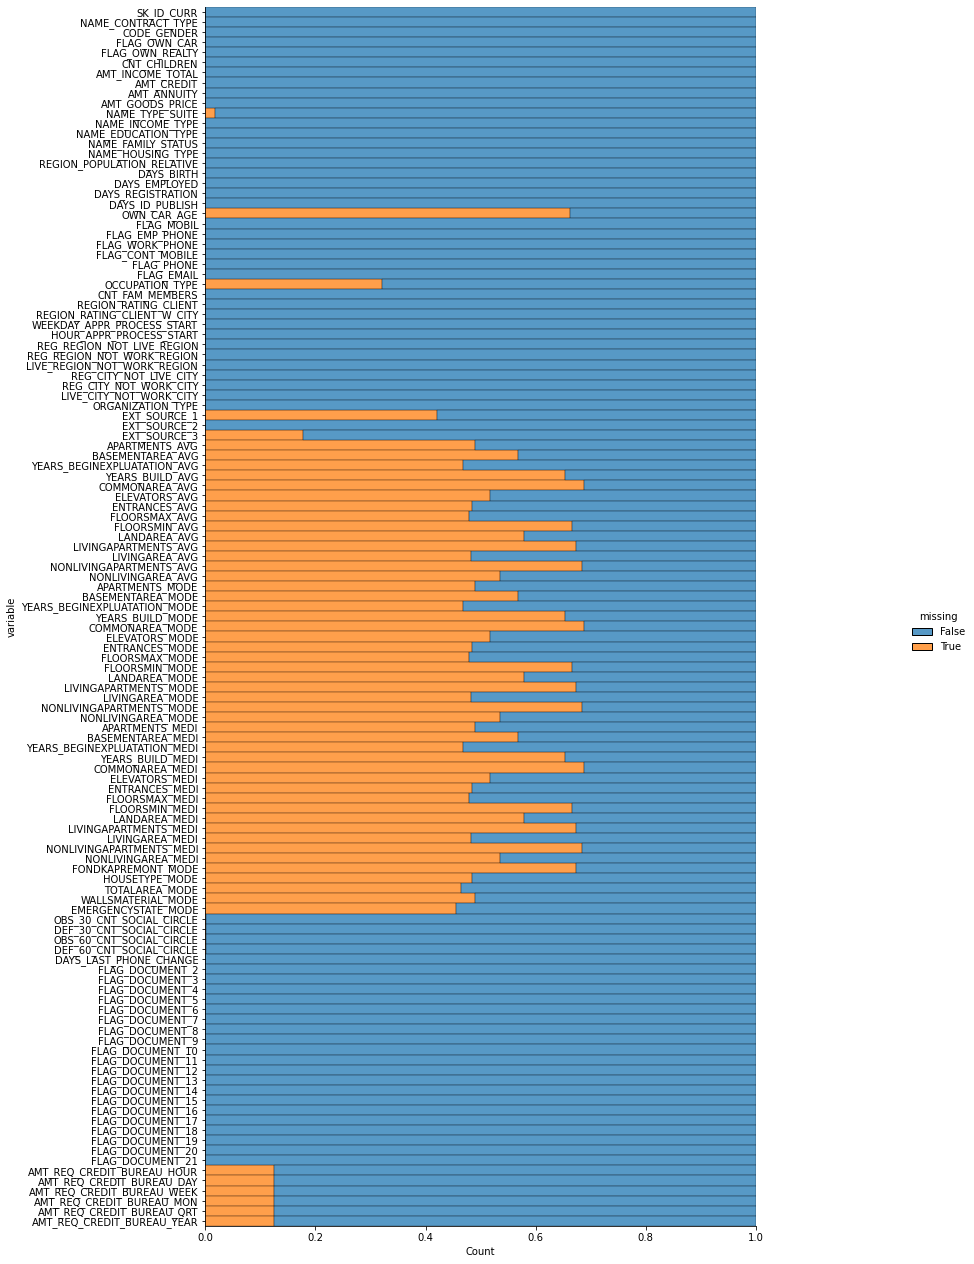

In [21]:
plot_missing_data("application_test",18,20)    

Observation:
Most of the data from training and test dataset is missing

## Summary of Previous Applications Table

In [22]:
datasets["previous_application"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [23]:
datasets["previous_application"].describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


Observation:          
Most of the Days columns have negative values. This should be an anamoly

## Missing Values of Previous applications table

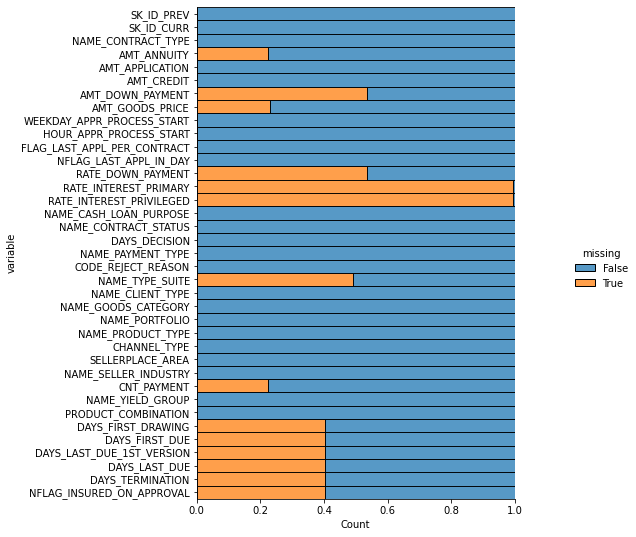

In [24]:
plot_missing_data("previous_application",10,8)

## Summary of Bureau Table

In [25]:
datasets["bureau"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [26]:
datasets["bureau"].describe()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.610875e+06,1.082775e+06,5.919400e+05,1.716428e+06,1.716415e+06,1.458759e+06,1.124648e+06,1.716428e+06,1.716428e+06,4.896370e+05
mean,2.782149e+05,5.924434e+06,-1.142108e+03,8.181666e-01,5.105174e+02,-1.017437e+03,3.825418e+03,6.410406e-03,3.549946e+05,1.370851e+05,6.229515e+03,3.791276e+01,-5.937483e+02,1.571276e+04
std,1.029386e+05,5.322657e+05,7.951649e+02,3.654443e+01,4.994220e+03,7.140106e+02,2.060316e+05,9.622391e-02,1.149811e+06,6.774011e+05,4.503203e+04,5.937650e+03,7.207473e+02,3.258269e+05
min,1.000010e+05,5.000000e+06,-2.922000e+03,0.000000e+00,-4.206000e+04,-4.202300e+04,0.000000e+00,0.000000e+00,0.000000e+00,-4.705600e+06,-5.864061e+05,0.000000e+00,-4.194700e+04,0.000000e+00
25%,1.888668e+05,5.463954e+06,-1.666000e+03,0.000000e+00,-1.138000e+03,-1.489000e+03,0.000000e+00,0.000000e+00,5.130000e+04,0.000000e+00,0.000000e+00,0.000000e+00,-9.080000e+02,0.000000e+00
50%,2.780550e+05,5.926304e+06,-9.870000e+02,0.000000e+00,-3.300000e+02,-8.970000e+02,0.000000e+00,0.000000e+00,1.255185e+05,0.000000e+00,0.000000e+00,0.000000e+00,-3.950000e+02,0.000000e+00
75%,3.674260e+05,6.385681e+06,-4.740000e+02,0.000000e+00,4.740000e+02,-4.250000e+02,0.000000e+00,0.000000e+00,3.150000e+05,4.015350e+04,0.000000e+00,0.000000e+00,-3.300000e+01,1.350000e+04
max,4.562550e+05,6.843457e+06,0.000000e+00,2.792000e+03,3.119900e+04,0.000000e+00,1.159872e+08,9.000000e+00,5.850000e+08,1.701000e+08,4.705600e+06,3.756681e+06,3.720000e+02,1.184534e+08


## Missing values in Bureau

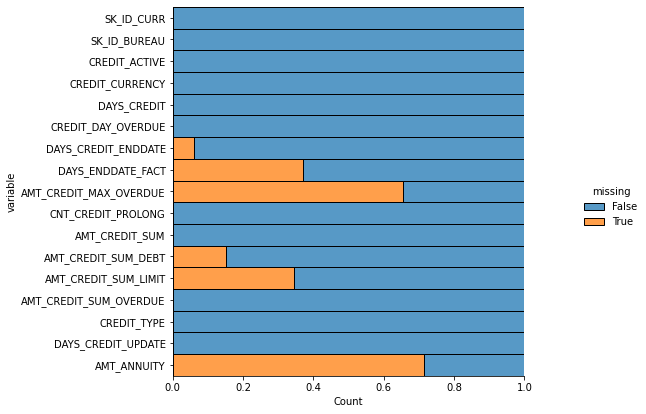

In [27]:
plot_missing_data("bureau",10,6)

## Summary of Bureau Balance

In [28]:
datasets["bureau_balance"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [29]:
datasets["bureau_balance"].describe()

,SK_ID_BUREAU,MONTHS_BALANCE
count,2.729992e+07,2.729992e+07
mean,6.036297e+06,-3.074169e+01
std,4.923489e+05,2.386451e+01
min,5.001709e+06,-9.600000e+01
25%,5.730933e+06,-4.600000e+01
50%,6.070821e+06,-2.500000e+01
75%,6.431951e+06,-1.100000e+01
max,6.842888e+06,0.000000e+00


## Missing values in Bureau Balance

In [30]:
percent = (datasets["bureau_balance"].isnull().sum()/datasets["bureau_balance"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["bureau_balance"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "bureau_balance Missing Count"])
missing_application_train_data.head(20)

,Percent,bureau_balance Missing Count
SK_ID_BUREAU,0.0,0
MONTHS_BALANCE,0.0,0
STATUS,0.0,0


## Summary of Credit Card Balance

In [31]:
datasets["credit_card_balance"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [32]:
datasets["credit_card_balance"].describe()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
count,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,...,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,3.840312e+06,3.840312e+06
mean,1.904504e+06,2.783242e+05,-3.452192e+01,5.830016e+04,1.538080e+05,5.961325e+03,7.433388e+03,2.881696e+02,2.968805e+03,3.540204e+03,...,5.596588e+04,5.808881e+04,5.809829e+04,3.094490e-01,7.031439e-01,4.812496e-03,5.594791e-01,2.082508e+01,9.283667e+00,3.316220e-01
std,5.364695e+05,1.027045e+05,2.666775e+01,1.063070e+05,1.651457e+05,2.822569e+04,3.384608e+04,8.201989e+03,2.079689e+04,5.600154e+03,...,1.025336e+05,1.059654e+05,1.059718e+05,1.100401e+00,3.190347e+00,8.263861e-02,3.240649e+00,2.005149e+01,9.751570e+01,2.147923e+01
min,1.000018e+06,1.000060e+05,-9.600000e+01,-4.202502e+05,0.000000e+00,-6.827310e+03,-6.211620e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,-4.233058e+05,-4.202502e+05,-4.202502e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434385e+06,1.895170e+05,-5.500000e+01,0.000000e+00,4.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00
50%,1.897122e+06,2.783960e+05,-2.800000e+01,0.000000e+00,1.125000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00
75%,2.369328e+06,3.675800e+05,-1.100000e+01,8.904669e+04,1.800000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.633911e+03,...,8.535924e+04,8.889949e+04,8.891451e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00
max,2.843496e+06,4.562500e+05,-1.000000e+00,1.505902e+06,1.350000e+06,2.115000e+06,2.287098e+06,1.529847e+06,2.239274e+06,2.028820e+05,...,1.472317e+06,1.493338e+06,1.493338e+06,5.100000e+01,1.650000e+02,1.200000e+01,1.650000e+02,1.200000e+02,3.260000e+03,3.260000e+03


## Missing values in Credit Card Balance

In [33]:
percent = (datasets["credit_card_balance"].isnull().sum()/datasets["credit_card_balance"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["credit_card_balance"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "credit_card_balance Missing Count"])
missing_application_train_data.head(20)

,Percent,credit_card_balance Missing Count
AMT_PAYMENT_CURRENT,20.00,767988
AMT_DRAWINGS_ATM_CURRENT,19.52,749816
CNT_DRAWINGS_POS_CURRENT,19.52,749816
AMT_DRAWINGS_OTHER_CURRENT,19.52,749816
AMT_DRAWINGS_POS_CURRENT,19.52,749816
CNT_DRAWINGS_OTHER_CURRENT,19.52,749816
CNT_DRAWINGS_ATM_CURRENT,19.52,749816
CNT_INSTALMENT_MATURE_CUM,7.95,305236
AMT_INST_MIN_REGULARITY,7.95,305236
SK_ID_PREV,0.00,0


## Summary of Installments payments

In [34]:
datasets["installments_payments"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


In [35]:
datasets["installments_payments"].describe()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360250e+07,1.360540e+07,1.360250e+07
mean,1.903365e+06,2.784449e+05,8.566373e-01,1.887090e+01,-1.042270e+03,-1.051114e+03,1.705091e+04,1.723822e+04
std,5.362029e+05,1.027183e+05,1.035216e+00,2.666407e+01,8.009463e+02,8.005859e+02,5.057025e+04,5.473578e+04
min,1.000001e+06,1.000010e+05,0.000000e+00,1.000000e+00,-2.922000e+03,-4.921000e+03,0.000000e+00,0.000000e+00
25%,1.434191e+06,1.896390e+05,0.000000e+00,4.000000e+00,-1.654000e+03,-1.662000e+03,4.226085e+03,3.398265e+03
50%,1.896520e+06,2.786850e+05,1.000000e+00,8.000000e+00,-8.180000e+02,-8.270000e+02,8.884080e+03,8.125515e+03
75%,2.369094e+06,3.675300e+05,1.000000e+00,1.900000e+01,-3.610000e+02,-3.700000e+02,1.671021e+04,1.610842e+04
max,2.843499e+06,4.562550e+05,1.780000e+02,2.770000e+02,-1.000000e+00,-1.000000e+00,3.771488e+06,3.771488e+06


## Missing values in Installments payments

In [36]:
# plot_missing_data("installments_payments",10,8)
percent = (datasets["installments_payments"].isnull().sum()/datasets["installments_payments"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["installments_payments"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "credit_card_balance Missing Count"])
missing_application_train_data.head(20)

,Percent,credit_card_balance Missing Count
DAYS_ENTRY_PAYMENT,0.02,2905
AMT_PAYMENT,0.02,2905
SK_ID_PREV,0.00,0
SK_ID_CURR,0.00,0
NUM_INSTALMENT_VERSION,0.00,0
NUM_INSTALMENT_NUMBER,0.00,0
DAYS_INSTALMENT,0.00,0
AMT_INSTALMENT,0.00,0


## Summary of POS CASH balance

In [37]:
datasets["POS_CASH_balance"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


In [38]:
datasets["POS_CASH_balance"].describe()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
count,1.000136e+07,1.000136e+07,1.000136e+07,9.975287e+06,9.975271e+06,1.000136e+07,1.000136e+07
mean,1.903217e+06,2.784039e+05,-3.501259e+01,1.708965e+01,1.048384e+01,1.160693e+01,6.544684e-01
std,5.358465e+05,1.027637e+05,2.606657e+01,1.199506e+01,1.110906e+01,1.327140e+02,3.276249e+01
min,1.000001e+06,1.000010e+05,-9.600000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434405e+06,1.895500e+05,-5.400000e+01,1.000000e+01,3.000000e+00,0.000000e+00,0.000000e+00
50%,1.896565e+06,2.786540e+05,-2.800000e+01,1.200000e+01,7.000000e+00,0.000000e+00,0.000000e+00
75%,2.368963e+06,3.674290e+05,-1.300000e+01,2.400000e+01,1.400000e+01,0.000000e+00,0.000000e+00
max,2.843499e+06,4.562550e+05,-1.000000e+00,9.200000e+01,8.500000e+01,4.231000e+03,3.595000e+03


## Missing values in POS CASH balance

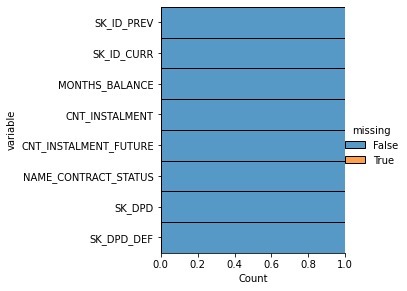

In [39]:
plot_missing_data("POS_CASH_balance",5,4)

## Distribution of Repaid and Unpaid Loan

<AxesSubplot:title={'center':'Loan Repayed(0) Or Loan Unpaid(1)'}, ylabel='values'>

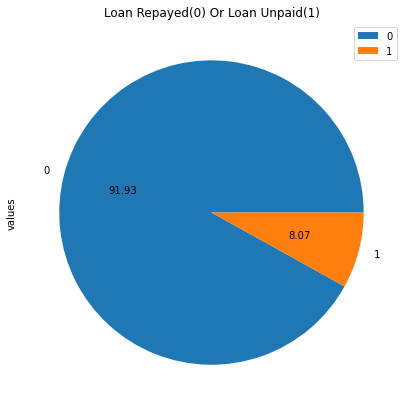

In [40]:
%matplotlib inline
application_train = datasets["application_train"]
temp = application_train["TARGET"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.plot.pie(y='values',title="Loan Repayed(0) Or Loan Unpaid(1)", figsize=(7,7), autopct='%.2f')

Observation:         
As we can see that the data is imbalanced, the proportion of applicants who have unpaid the loans is very less

## Type of Applicant's Occupation

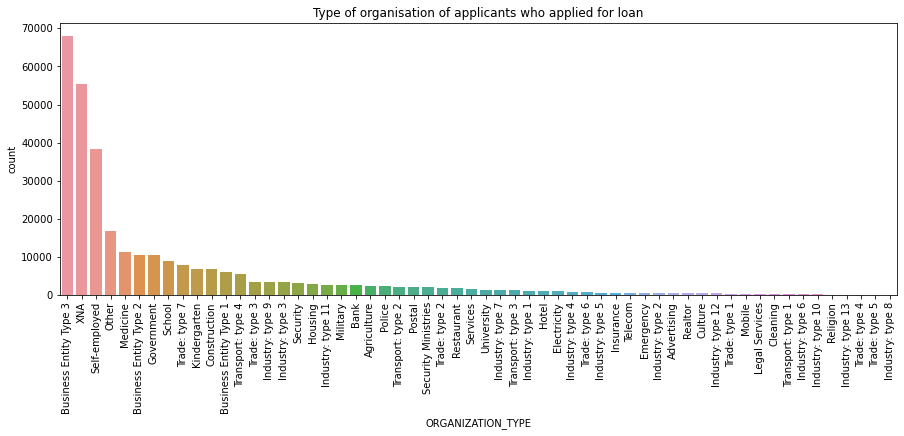

In [41]:
plt.figure(figsize=(15,5))
sns.countplot(x='ORGANIZATION_TYPE', data=datasets["application_train"], order = datasets["application_train"]['ORGANIZATION_TYPE'].value_counts().index);
plt.title('Type of organisation of applicants who applied for loan');
plt.xticks(rotation=90);

 **Types of Organizations who applied for loan :**
  * Business Entity Type 3 - Approx. 68 K
  * XNA - Approx. 55 K
  * Self employed - Approx. 38 K

## Applicants Age 

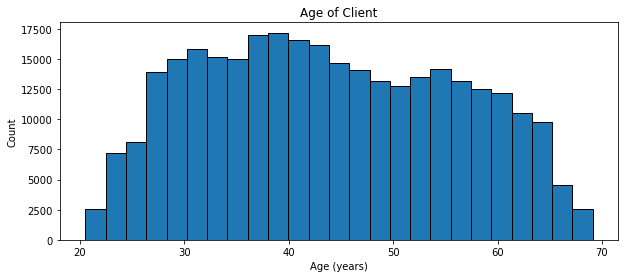

In [42]:
plt.figure(figsize=(10,4))
plt.hist(datasets["application_train"]['DAYS_BIRTH'] / -365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

### Applicants Age category with respect to Loan Repaid target variable

In [43]:
datasets["application_train"]['age'] = (np.round(datasets["application_train"]['DAYS_BIRTH']/-365))

datasets["application_train"].loc[(datasets["application_train"]['age'] > 20) & (datasets["application_train"]
                                                                                ['age'] <= 30), 'age_cat'] = '20-30'
datasets["application_train"].loc[(datasets["application_train"]['age'] > 30) & (datasets["application_train"]
                                                                                ['age'] <= 40), 'age_cat'] = '30-40'
datasets["application_train"].loc[(datasets["application_train"]['age'] > 40) & (datasets["application_train"]
                                                                                ['age'] <= 50), 'age_cat'] = '40-50'
datasets["application_train"].loc[(datasets["application_train"]['age'] > 50) & (datasets["application_train"]
                                                                                ['age'] <= 60), 'age_cat'] = '50-60'
datasets["application_train"].loc[(datasets["application_train"]['age'] > 60) & (datasets["application_train"]
                                                                                ['age'] <= 70), 'age_cat'] = '60-70'
datasets["application_train"].head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,age,age_cat
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,26.0,20-30
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,40-50
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,50-60
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,52.0,50-60
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,50-60


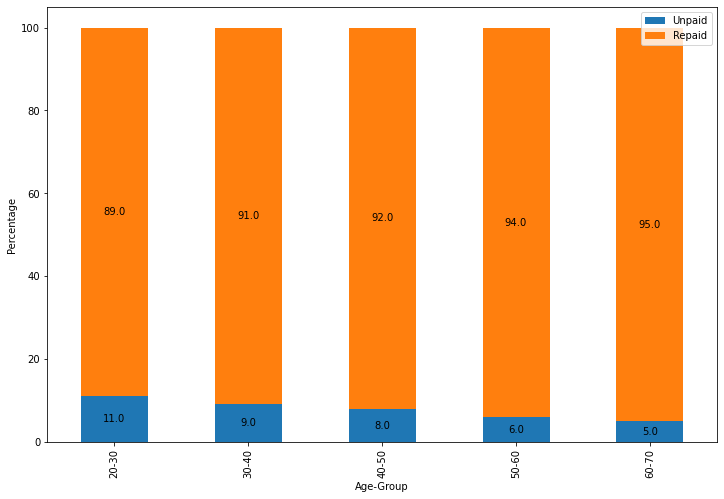

In [44]:
plotdata = pd.DataFrame({
    "Unpaid":np.round((datasets["application_train"].groupby(['age_cat'])['TARGET'].sum()/datasets["application_train"].groupby(['age_cat'])['TARGET'].count())*100),
    "Repaid":np.round(((datasets["application_train"].groupby(['age_cat'])['TARGET'].count() - datasets["application_train"].groupby(['age_cat'])['TARGET'].sum())/datasets["application_train"].groupby(['age_cat'])['TARGET'].count())*100),
    }, 
    index=['20-30','30-40','40-50','50-60','60-70']
)
ax = plotdata.plot(kind="bar", stacked=True, xlabel="Age-Group", ylabel="Percentage", figsize=(12,8))
for c in ax.containers:

    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center')

Observation:               
People of higher age groups are more likely to repay the loans than people of lower age group.   

## Applicants occupations

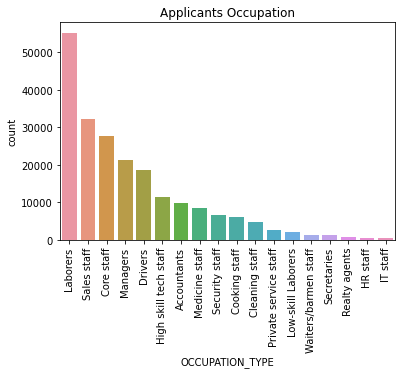

In [45]:
sns.countplot(x='OCCUPATION_TYPE', data=datasets["application_train"], order = datasets["application_train"]['OCCUPATION_TYPE'].value_counts().index);

plt.title('Applicants Occupation');
plt.xticks(rotation=90);

Observations:              
Most of the loan applicants are Laborers, Sale's Staff and Core Staff.

## Pair-based Evaluation of Categorical variables of Train dataset with Target variable

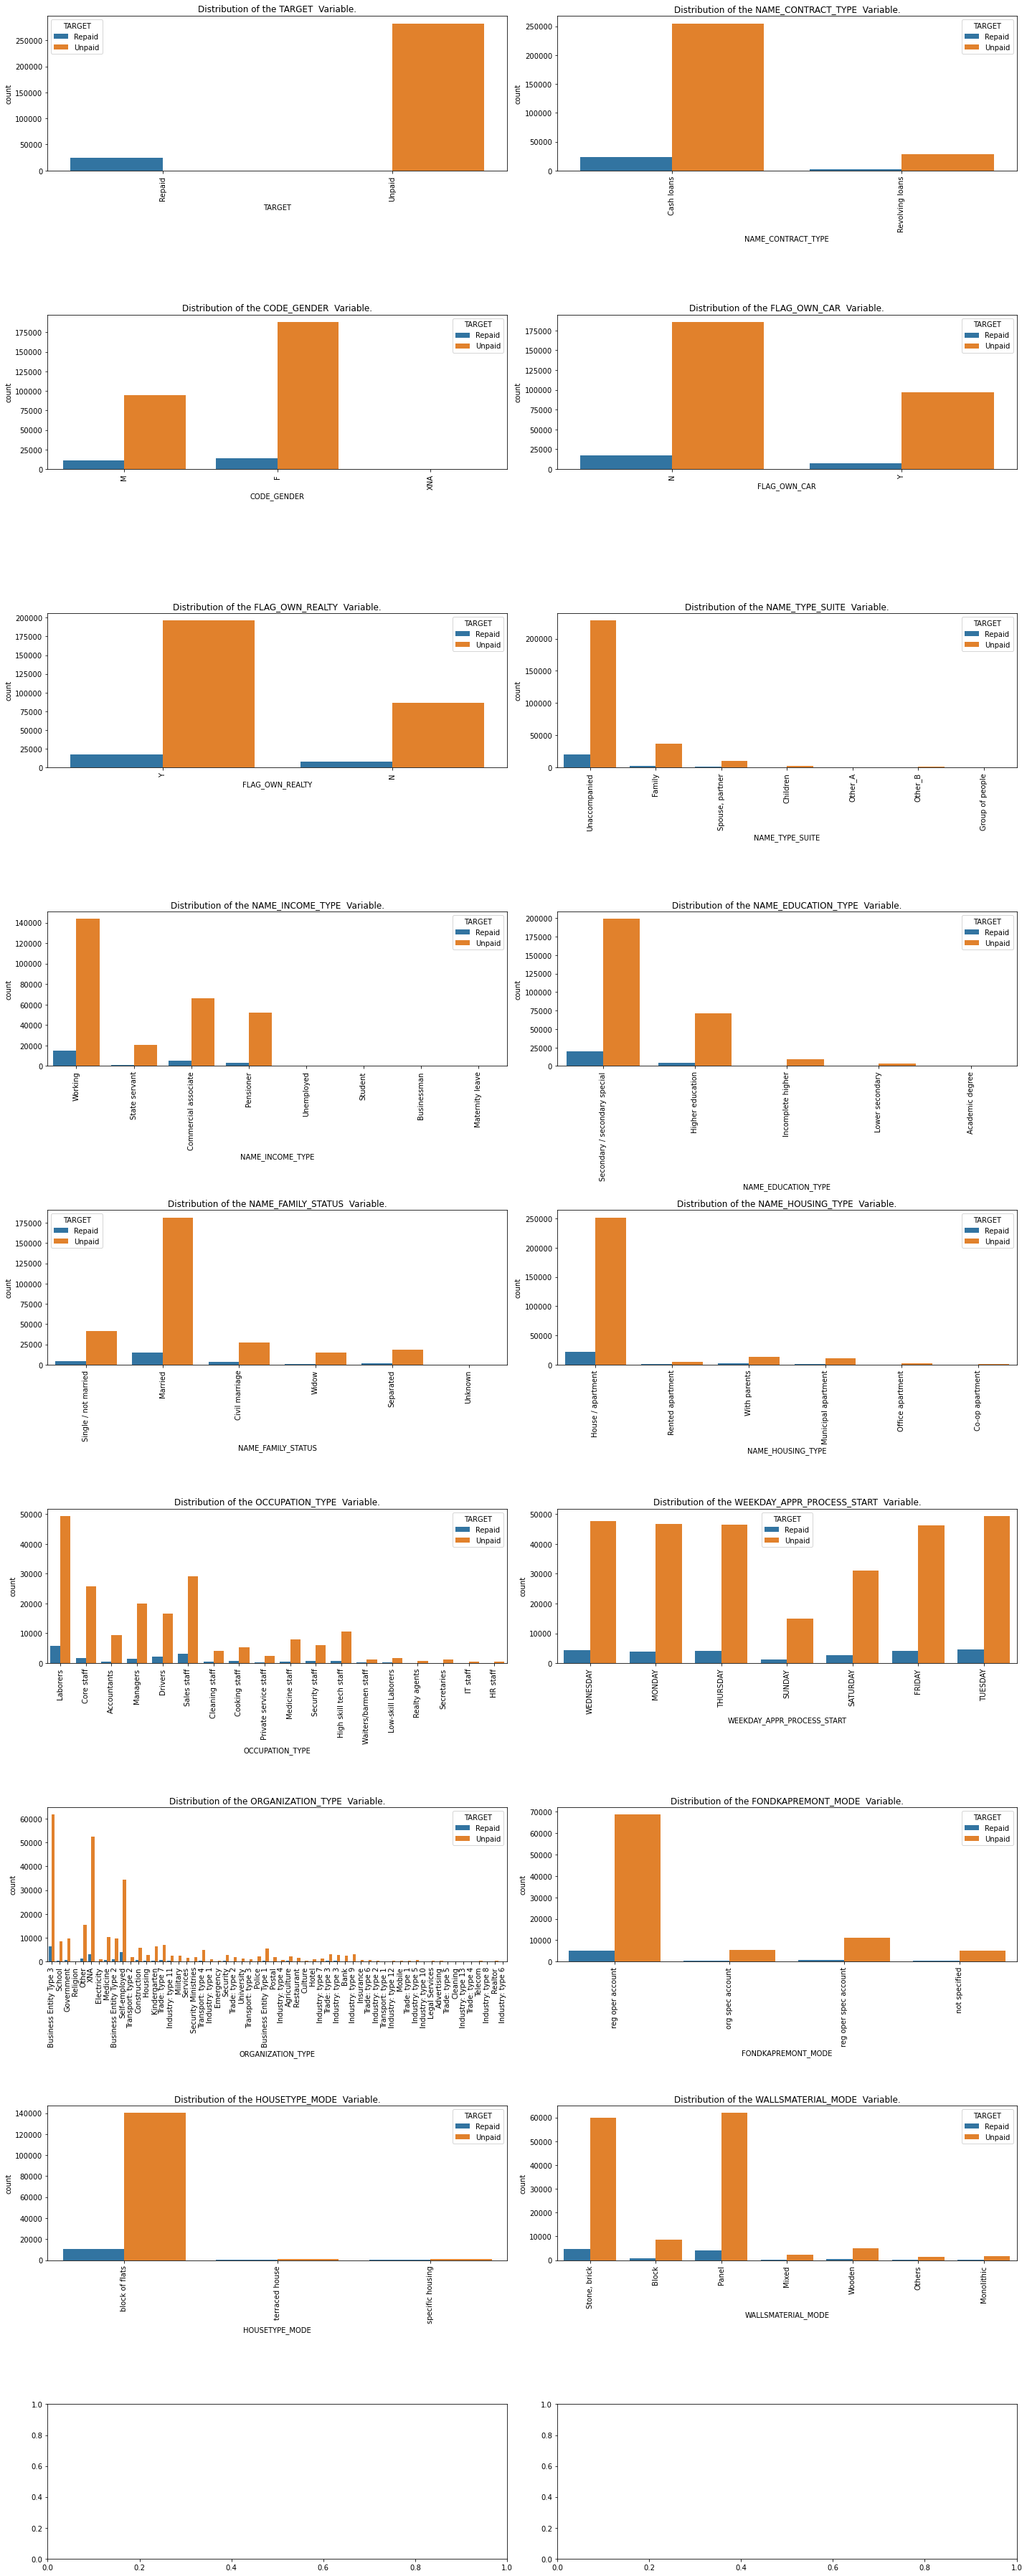

In [46]:
df = datasets["application_train"].copy()
df['TARGET'].replace(0, "Unpaid", inplace=True)
df['TARGET'].replace(1, "Repaid", inplace=True)

categorical_col = []

for col in df:
    if df[col].dtype == 'object':
        categorical_col.append(col)

plot_x = int(len(categorical_col)/2)
fig, ax = plt.subplots(plot_x, 2, figsize=(20, 50))

num = 0
for i in range(0, 8):
    for j in range(0,2):
        tst = sns.countplot(x=categorical_col[num],
                           data=df, hue='TARGET', ax=ax[i][j])
        tst.set_title(f"Distribution of the {categorical_col[num]}  Variable.")
        tst.set_xticklabels(tst.get_xticklabels(), rotation=90)
        plt.subplots_adjust(left=None, bottom=None, right=None,
                    top=None, wspace=None, hspace=0.45)
        num = num + 1
        plt.tight_layout()

## Correlation of numeric variables with the Target variable

In [47]:
correlations = np.abs(datasets["application_train"].corr()['TARGET']).sort_values(ascending=False)
print('High value Correlations:\n', correlations.head(11))

High value Correlations:
 TARGET                         1.000000
EXT_SOURCE_3                   0.178919
EXT_SOURCE_2                   0.160472
EXT_SOURCE_1                   0.155317
age                            0.078263
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
Name: TARGET, dtype: float64


In [48]:
from pandas.plotting import scatter_matrix
#We can take the top 10 features
top_corr_features = ["TARGET", "REGION_RATING_CLIENT","REGION_RATING_CLIENT_W_CITY","DAYS_LAST_PHONE_CHANGE",
               "DAYS_BIRTH", "EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3", "DAYS_ID_PUBLISH","REG_CITY_NOT_WORK_CITY"]
# scatter_matrix(datasets["application_train"][top_corr_features], figsize=(12, 8));
df = datasets["application_train"].copy()
df2 = df[top_corr_features]
corr = df2.corr()
corr.style.background_gradient(cmap='PuBu').set_precision(2)

,TARGET,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,DAYS_LAST_PHONE_CHANGE,DAYS_BIRTH,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_ID_PUBLISH,REG_CITY_NOT_WORK_CITY
TARGET,1.00,0.06,0.06,0.06,0.08,-0.16,-0.16,-0.18,0.05,0.05
REGION_RATING_CLIENT,0.06,1.00,0.95,0.03,0.01,-0.12,-0.29,-0.01,-0.01,0.01
REGION_RATING_CLIENT_W_CITY,0.06,0.95,1.00,0.03,0.01,-0.12,-0.29,-0.01,-0.01,0.03
DAYS_LAST_PHONE_CHANGE,0.06,0.03,0.03,1.00,0.08,-0.13,-0.20,-0.08,0.09,0.05
DAYS_BIRTH,0.08,0.01,0.01,0.08,1.00,-0.60,-0.09,-0.21,0.27,0.24
EXT_SOURCE_1,-0.16,-0.12,-0.12,-0.13,-0.60,1.00,0.21,0.19,-0.13,-0.19
EXT_SOURCE_2,-0.16,-0.29,-0.29,-0.20,-0.09,0.21,1.00,0.11,-0.05,-0.08
EXT_SOURCE_3,-0.18,-0.01,-0.01,-0.08,-0.21,0.19,0.11,1.00,-0.13,-0.08
DAYS_ID_PUBLISH,0.05,-0.01,-0.01,0.09,0.27,-0.13,-0.05,-0.13,1.00,0.10
REG_CITY_NOT_WORK_CITY,0.05,0.01,0.03,0.05,0.24,-0.19,-0.08,-0.08,0.10,1.00


* Ext_source_1, Ext_source_2, Ext_source_3 and DAYS_BIRTH (i.e. Age) are the most highly correlated with the Loan Repaid target variable

## previous applications for the submission file
The persons in the kaggle submission file have had previous applications in the `previous_application.csv`. 47,800 out 48,744 people have had previous appications.

In [49]:
appsDF = datasets["previous_application"]

### Histogram of Number of previous applications for an ID

In [50]:
sum(appsDF['SK_ID_CURR'].value_counts()==1)

60458

Text(0.5, 1.0, 'Histogram of Number of previous applications for an ID')

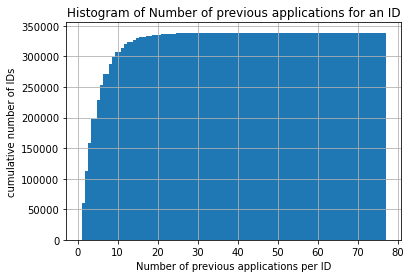

In [51]:
plt.hist(appsDF['SK_ID_CURR'].value_counts(), cumulative =True, bins = 100);
plt.grid()
plt.ylabel('cumulative number of IDs')
plt.xlabel('Number of previous applications per ID')
plt.title('Histogram of Number of previous applications for an ID')


##### **Can we differentiate applications by low, medium and high previous apps?**
    * Low = <5 claims (22%)
    * Medium = 10 to 39 claims (58%)
    * High = 40 or more claims (20%)

In [52]:
apps_all = appsDF['SK_ID_CURR'].nunique()
apps_5plus = appsDF['SK_ID_CURR'].value_counts()>=5
apps_40plus = appsDF['SK_ID_CURR'].value_counts()>=40
print('Percentage with 10 or more previous apps:', np.round(100.*(sum(apps_5plus)/apps_all),5))
print('Percentage with 40 or more previous apps:', np.round(100.*(sum(apps_40plus)/apps_all),5))

Percentage with 10 or more previous apps: 41.76895
Percentage with 40 or more previous apps: 0.03453


# Joining secondary tables with the primary table

In the case of the HCDR competition (and many other machine learning problems that involve multiple tables in 3NF or not)  we need to join these datasets (denormalize) when using a machine learning pipeline. Joining the secondary tables with the primary table will lead to lots of new features about each loan application; these features will tend to be aggregate type features or meta data about the loan or its application. How can we do this when using Machine Learning Pipelines?

## Joining `previous_application` with `application_x`
We refer to the `application_train` data (and also `application_test` data also) as the **primary table** and the other files as the **secondary tables** (e.g., `previous_application` dataset). All tables can be joined using the primary key `SK_ID_PREV`.

Let's assume we wish to generate a feature based on previous application attempts. In this case, possible features here could be:

* A simple feature could be the number of previous applications.
* Other summary features of original features such as `AMT_APPLICATION`, `AMT_CREDIT` could be based on average, min, max, median, etc.
 
To build such features, we need to join the `application_train` data (and also `application_test` data also) with the 'previous_application' dataset (and the other available datasets).

When joining this data in the context of pipelines, different strategies come to mind with various tradeoffs:

1. Preprocess each of the non-application data sets, thereby generating many new (derived) features, and then joining (aka merge) the results with the `application_train` data (the labeled dataset) and with the `application_test` data (the unlabeled submission dataset) prior to processing the data (in a train, valid, test partition) via your machine learning pipeline. [This approach is recommended for this HCDR competition. WHY?]

* Do the joins as part of the transformation steps. [Not recommended here. WHY?]. How can this be done? Will it work?
  * This would be necessary if we had dataset wide features such as IDF (inverse document frequency) which depend on the entire subset of data as opposed to a single loan application (e.g., a feature about the relative amount applied for such as the percentile of the loan amount being applied for).
 
I want you to think about this section and build on this.

## Roadmap for secondary table processing

1. Transform all the secondary tables to features that can be joined into the main table the application table (labeled and unlabeled)
   * 'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments', 
   * 'previous_application', 'POS_CASH_balance'
* Merge the transformed secondary tables with the primary tables (i.e., the `application_train` data (the labeled dataset) and with the `application_test` data (the unlabeled submission dataset)), thereby leading to X_train, y_train, X_valid, etc.
* Proceed with the learning pipeline using X_train, y_train, X_valid, etc.
* Generate a submission file using the learnt model


In [53]:
appsDF.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

## Missing values in prevApps

In [54]:
appsDF.isna().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [55]:
appsDF.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

## feature engineering for prevApp table

In [56]:
features = ['AMT_ANNUITY', 'AMT_APPLICATION']
print(f"{appsDF[features].describe()}")
agg_ops = ["min", "max", "mean"]
result = appsDF.groupby(["SK_ID_CURR"], as_index=False).agg("mean") #group by ID
display(result.head())
print("-"*50)
result = appsDF.groupby(["SK_ID_CURR"], as_index=False).agg({'AMT_ANNUITY' : agg_ops, 'AMT_APPLICATION' : agg_ops})
result.columns = result.columns.map('_'.join)
display(result)
result['range_AMT_APPLICATION'] = result['AMT_APPLICATION_max'] - result['AMT_APPLICATION_min']
print(f"result.shape: {result.shape}")
result[0:10]

        AMT_ANNUITY  AMT_APPLICATION
count  1.297979e+06     1.670214e+06
mean   1.595512e+04     1.752339e+05
std    1.478214e+04     2.927798e+05
min    0.000000e+00     0.000000e+00
25%    6.321780e+03     1.872000e+04
50%    1.125000e+04     7.104600e+04
75%    2.065842e+04     1.803600e+05
max    4.180581e+05     6.905160e+06


,SK_ID_CURR,SK_ID_PREV,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100001,1.369693e+06,3951.000,24835.50,23787.00,2520.0,24835.5,13.000000,1.0,0.104326,...,NaN,-1740.0,23.0,8.0,365243.0,-1709.000000,-1499.000000,-1619.000000,-1612.000000,0.000000
1,100002,1.038818e+06,9251.775,179055.00,179055.00,0.0,179055.0,9.000000,1.0,0.000000,...,NaN,-606.0,500.0,24.0,365243.0,-565.000000,125.000000,-25.000000,-17.000000,0.000000
2,100003,2.281150e+06,56553.990,435436.50,484191.00,3442.5,435436.5,14.666667,1.0,0.050030,...,NaN,-1305.0,533.0,10.0,365243.0,-1274.333333,-1004.333333,-1054.333333,-1047.333333,0.666667
3,100004,1.564014e+06,5357.250,24282.00,20106.00,4860.0,24282.0,5.000000,1.0,0.212008,...,NaN,-815.0,30.0,4.0,365243.0,-784.000000,-694.000000,-724.000000,-714.000000,0.000000
4,100005,2.176837e+06,4813.200,22308.75,20076.75,4464.0,44617.5,10.500000,1.0,0.108964,...,NaN,-536.0,18.0,12.0,365243.0,-706.000000,-376.000000,-466.000000,-460.000000,0.000000


--------------------------------------------------


,SK_ID_CURR_,AMT_ANNUITY_min,AMT_ANNUITY_max,AMT_ANNUITY_mean,AMT_APPLICATION_min,AMT_APPLICATION_max,AMT_APPLICATION_mean
0,100001,3951.000,3951.000,3951.000000,24835.5,24835.5,24835.500
1,100002,9251.775,9251.775,9251.775000,179055.0,179055.0,179055.000
2,100003,6737.310,98356.995,56553.990000,68809.5,900000.0,435436.500
3,100004,5357.250,5357.250,5357.250000,24282.0,24282.0,24282.000
4,100005,4813.200,4813.200,4813.200000,0.0,44617.5,22308.750
...,...,...,...,...,...,...,...
338852,456251,6605.910,6605.910,6605.910000,40455.0,40455.0,40455.000
338853,456252,10074.465,10074.465,10074.465000,57595.5,57595.5,57595.500
338854,456253,3973.095,5567.715,4770.405000,19413.0,28912.5,24162.750
338855,456254,2296.440,19065.825,10681.132500,18846.0,223789.5,121317.750


result.shape: (338857, 8)


,SK_ID_CURR_,AMT_ANNUITY_min,AMT_ANNUITY_max,AMT_ANNUITY_mean,AMT_APPLICATION_min,AMT_APPLICATION_max,AMT_APPLICATION_mean,range_AMT_APPLICATION
0,100001,3951.000,3951.000,3951.000000,24835.5,24835.5,24835.500000,0.0
1,100002,9251.775,9251.775,9251.775000,179055.0,179055.0,179055.000000,0.0
2,100003,6737.310,98356.995,56553.990000,68809.5,900000.0,435436.500000,831190.5
3,100004,5357.250,5357.250,5357.250000,24282.0,24282.0,24282.000000,0.0
4,100005,4813.200,4813.200,4813.200000,0.0,44617.5,22308.750000,44617.5
5,100006,2482.920,39954.510,23651.175000,0.0,688500.0,272203.260000,688500.0
6,100007,1834.290,22678.785,12278.805000,17176.5,247500.0,150530.250000,230323.5
7,100008,8019.090,25309.575,15839.696250,0.0,450000.0,155701.800000,450000.0
8,100009,7435.845,17341.605,10051.412143,40455.0,110160.0,76741.714286,69705.0
9,100010,27463.410,27463.410,27463.410000,247212.0,247212.0,247212.000000,0.0


## One Hot Encoding for Categorical variables

In [123]:
#Bureau
# FEATURE 1 - NUMBER OF PAST LOANS PER CUSTOMER
B = datasets['bureau']
grp = B[['SK_ID_CURR', 'DAYS_CREDIT']].groupby(by = ['SK_ID_CURR'])['DAYS_CREDIT'].count().reset_index().rename(index=str, columns={'DAYS_CREDIT': 'BUREAU_LOAN_COUNT'})
B = B.merge(grp, on = ['SK_ID_CURR'], how = 'left')
# B.head()



#FEATURE 2 - NUMBER OF TYPES OF PAST LOANS PER CUSTOMER
grp = B[['SK_ID_CURR', 'CREDIT_TYPE']].groupby(by = ['SK_ID_CURR'])['CREDIT_TYPE'].nunique().reset_index().rename(index=str, columns={'CREDIT_TYPE': 'BUREAU_LOAN_TYPES'})
bureau = B.merge(grp, on = ['SK_ID_CURR'], how = 'left')
print(bureau.shape)

(1716428, 19)


In [124]:
import gc
#Credit Card
#FEATURE 1 - NUMBER OF LOANS PER CUSTOMER
CCB = datasets['credit_card_balance']
grp = CCB.groupby(by = ['SK_ID_CURR'])['SK_ID_PREV'].nunique().reset_index().rename(index = str, columns = {'SK_ID_PREV': 'NO_LOANS'})
CCB = CCB.merge(grp, on = ['SK_ID_CURR'], how = 'left')
del grp
gc.collect()
print(CCB.dtypes, CCB.shape)


#Credit Card
#FEATURE 2 - AVERAGE OF DAYS PAST DUE PER CUSTOMER
grp = CCB.groupby(by= ['SK_ID_CURR'])['SK_DPD'].mean().reset_index().rename(index = str, columns = {'SK_DPD': 'AVG_DPD'})
credit_card_balance = CCB.merge(grp, on = ['SK_ID_CURR'], how = 'left')
del grp
gc.collect()

SK_ID_PREV                      int64
SK_ID_CURR                      int64
MONTHS_BALANCE                  int64
AMT_BALANCE                   float64
AMT_CREDIT_LIMIT_ACTUAL         int64
AMT_DRAWINGS_ATM_CURRENT      float64
AMT_DRAWINGS_CURRENT          float64
AMT_DRAWINGS_OTHER_CURRENT    float64
AMT_DRAWINGS_POS_CURRENT      float64
AMT_INST_MIN_REGULARITY       float64
AMT_PAYMENT_CURRENT           float64
AMT_PAYMENT_TOTAL_CURRENT     float64
AMT_RECEIVABLE_PRINCIPAL      float64
AMT_RECIVABLE                 float64
AMT_TOTAL_RECEIVABLE          float64
CNT_DRAWINGS_ATM_CURRENT      float64
CNT_DRAWINGS_CURRENT            int64
CNT_DRAWINGS_OTHER_CURRENT    float64
CNT_DRAWINGS_POS_CURRENT      float64
CNT_INSTALMENT_MATURE_CUM     float64
NAME_CONTRACT_STATUS           object
SK_DPD                          int64
SK_DPD_DEF                      int64
NO_LOANS                        int64
dtype: object (3840312, 24)


0

In [125]:
def one_hot_encoder(df):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= False)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns




appsDF_enc, appsDF_enc_cat_cols = one_hot_encoder(appsDF)
bureau_enc, bureau_cat_cols = one_hot_encoder(bureau)
bureau_balance_enc, bureau_balance_cat_cols = one_hot_encoder(datasets['bureau_balance'])
credit_enc, credit_cat_cols = one_hot_encoder(credit_card_balance)
install_pay_enc, install_pay_cat_cols = one_hot_encoder(datasets["installments_payments"])
pos_cash_enc, pos_cash_cat_cols = one_hot_encoder(datasets["POS_CASH_balance"])



appsDF_enc.head()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,PRODUCT_COMBINATION_Cash X-Sell: low,PRODUCT_COMBINATION_Cash X-Sell: middle,PRODUCT_COMBINATION_POS household with interest,PRODUCT_COMBINATION_POS household without interest,PRODUCT_COMBINATION_POS industry with interest,PRODUCT_COMBINATION_POS industry without interest,PRODUCT_COMBINATION_POS mobile with interest,PRODUCT_COMBINATION_POS mobile without interest,PRODUCT_COMBINATION_POS other with interest,PRODUCT_COMBINATION_POS others without interest
0,2030495,271877,1730.430,17145.0,17145.0,0.0,17145.0,15,1,0.0,...,0,0,0,0,0,0,1,0,0,0
1,2802425,108129,25188.615,607500.0,679671.0,NaN,607500.0,11,1,NaN,...,1,0,0,0,0,0,0,0,0,0
2,2523466,122040,15060.735,112500.0,136444.5,NaN,112500.0,11,1,NaN,...,0,0,0,0,0,0,0,0,0,0
3,2819243,176158,47041.335,450000.0,470790.0,NaN,450000.0,7,1,NaN,...,0,1,0,0,0,0,0,0,0,0
4,1784265,202054,31924.395,337500.0,404055.0,NaN,337500.0,9,1,NaN,...,0,0,0,0,0,0,0,0,0,0


In [126]:
#appsDF.shape
#bureau_balance_enc.head()
#datasets['bureau_balance'].head()
# datasets['bureau_balance'].info()
#datasets['bureau_balance'].head()
bureau_balance_enc.rename(columns={"SK_ID_BUREAU":"SK_ID_CURR"}, inplace=True)

In [127]:
bureau_balance_enc.head()

,SK_ID_CURR,MONTHS_BALANCE,STATUS_0,STATUS_1,STATUS_2,STATUS_3,STATUS_4,STATUS_5,STATUS_C,STATUS_X
0,5715448,0,0,0,0,0,0,0,1,0
1,5715448,-1,0,0,0,0,0,0,1,0
2,5715448,-2,0,0,0,0,0,0,1,0
3,5715448,-3,0,0,0,0,0,0,1,0
4,5715448,-4,0,0,0,0,0,0,1,0


In [128]:
#previous_application
prev_app_group = appsDF_enc.groupby(["SK_ID_CURR"], as_index=False).agg("mean")#bureau
# bureau = datasets["bureau"]
bureau_group = bureau_enc.groupby(["SK_ID_CURR"], as_index=False).agg("mean")#bureau_balance
bureau_balance_group = bureau_balance_enc.groupby(["SK_ID_CURR"], as_index=False).agg("mean")#credit_card_balance
# credit_card_balance = datasets["credit_card_balance"]
credit_card_balance_group = credit_enc.groupby(["SK_ID_CURR"], as_index=False).agg("mean")#installments_payments
installments_payments_group = install_pay_enc.groupby(["SK_ID_CURR"], as_index=False).agg("mean")#POS_CASH_balance
POS_CASH_balance_group = pos_cash_enc.groupby(["SK_ID_CURR"], as_index=False).agg("mean")

In [129]:
# #previous_application
# prev_app_group = appsDF.groupby(["SK_ID_CURR"], as_index=False).agg("mean")

# #bureau
# # bureau = datasets["bureau"]
# bureau_group = bureau.groupby(["SK_ID_CURR"], as_index=False).agg("mean")

# #bureau_balance
# bureau_balance = datasets["bureau_balance"]
# bureau_balance_group = bureau.groupby(["SK_ID_CURR"], as_index=False).agg("mean")

# #credit_card_balance
# # credit_card_balance = datasets["credit_card_balance"]
# credit_card_balance_group = credit_card_balance.groupby(["SK_ID_CURR"], as_index=False).agg("mean")

# #installments_payments
# installments_payments = datasets["installments_payments"]
# installments_payments_group = installments_payments.groupby(["SK_ID_CURR"], as_index=False).agg("mean")

# #POS_CASH_balance
# POS_CASH_balance = datasets["POS_CASH_balance"]
# POS_CASH_balance_group = POS_CASH_balance.groupby(["SK_ID_CURR"], as_index=False).agg("mean")

In [130]:
X_train= datasets["application_train"]
print('x_train_1st',X_train.shape)
X_train = X_train.merge(prev_app_group, how='left', on='SK_ID_CURR')
print('x_train_2nd',X_train.shape)
X_train = X_train.merge(bureau_group, how='left', on='SK_ID_CURR')
print('x_train_3rd',X_train.shape)
X_train = X_train.merge(bureau_balance_group, how='left', on='SK_ID_CURR')
print('x_train_4th',X_train.shape)
X_train = X_train.merge(credit_card_balance_group, how='left', on='SK_ID_CURR')
print('x_train_6th',X_train.shape)
X_train = X_train.merge(installments_payments_group, how='left', on='SK_ID_CURR')
print('x_train_7th',X_train.shape)
X_train = X_train.merge(POS_CASH_balance_group, how='left', on='SK_ID_CURR')
print('x_train_8th',X_train.shape)
X_train.head()
# ['application_train', 'application_test', 'bureau',
# 'bureau_balance', 'credit_card_balance', 'installments_payments',
# 'previous_application', 'POS_CASH_balance', 'age']


x_train_1st (307511, 124)
x_train_2nd (307511, 287)
x_train_3rd (307511, 325)
x_train_4th (307511, 334)
x_train_6th (307511, 364)
x_train_7th (307511, 371)
x_train_8th (307511, 386)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,SK_DPD_DEF_y,NAME_CONTRACT_STATUS_Active_y,NAME_CONTRACT_STATUS_Amortized debt,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_Canceled_y,NAME_CONTRACT_STATUS_Completed_y,NAME_CONTRACT_STATUS_Demand_y,NAME_CONTRACT_STATUS_Returned to the store,NAME_CONTRACT_STATUS_Signed_y,NAME_CONTRACT_STATUS_XNA
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,1.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.928571,0.0,0.0,0.0,0.071429,0.0,0.000000,0.000000,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.750000,0.0,0.0,0.0,0.250000,0.0,0.000000,0.000000,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.857143,0.0,0.0,0.0,0.095238,0.0,0.047619,0.000000,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.939394,0.0,0.0,0.0,0.045455,0.0,0.000000,0.015152,0.0


In [131]:
X_train.drop([col for col in X_train.columns if col.endswith('_y')],axis=1,inplace=True)   
# x_testing.shape
temp = {}
for i in X_train.columns:
    if i[-2:] == '_x':
        temp[i]=i[:-2]
X_train.rename(temp, axis=1, inplace=True)        
X_train.shape

(307511, 370)

In [132]:
correlations = np.abs(X_train.corr()['TARGET']).sort_values(ascending=False)
print('High value Correlations:\n', correlations.head(31))

High value Correlations:
 TARGET                           1.000000
EXT_SOURCE_3                     0.178919
EXT_SOURCE_2                     0.160472
EXT_SOURCE_1                     0.155317
CNT_DRAWINGS_ATM_CURRENT         0.107692
DAYS_CREDIT                      0.089729
AMT_BALANCE                      0.087177
AMT_TOTAL_RECEIVABLE             0.086490
AMT_RECIVABLE                    0.086478
AMT_RECEIVABLE_PRINCIPAL         0.086062
CNT_DRAWINGS_CURRENT             0.082520
CREDIT_ACTIVE_Closed             0.079369
age                              0.078263
DAYS_BIRTH                       0.078239
NAME_CONTRACT_STATUS_Refused     0.077671
CREDIT_ACTIVE_Active             0.077356
CODE_REJECT_REASON_XAP           0.073930
AMT_INST_MIN_REGULARITY          0.073724
DAYS_CREDIT_UPDATE               0.068927
NAME_CONTRACT_STATUS_Approved    0.063521
REGION_RATING_CLIENT_W_CITY      0.060893
AMT_DRAWINGS_ATM_CURRENT         0.059925
REGION_RATING_CLIENT             0.058899
AMT_DRAW

## feature transformer for prevApp table

In [133]:
# Create aggregate features (via pipeline)
class prevAppsFeaturesAggregater(BaseEstimator, TransformerMixin):
    def __init__(self, features=None): # no *args or **kargs
        self.features = features
        self.agg_ops = ["min", "max", "mean"]

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        #from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit         
        result = X.groupby(["SK_ID_CURR"], as_index=False).agg({f"{f}":self.agg_ops for f in self.features})
        result.columns = result.columns.map('_'.join)
        result['range_AMT_APPLICATION'] = result['AMT_APPLICATION_max'] - result['AMT_APPLICATION_min']
        return result # return dataframe with the join key "SK_ID_CURR"
    

from sklearn.pipeline import make_pipeline 
def test_driver_prevAppsFeaturesAggregater(df, features):
    print(f"df.shape: {df.shape}\n")
    print(f"df[{features}][0:5]: \n{df[features][0:5]}")
    test_pipeline = make_pipeline(prevAppsFeaturesAggregater(features))
    return(test_pipeline.fit_transform(df))
         
features = ['AMT_ANNUITY', 'AMT_APPLICATION']
features = ['AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CNT_PAYMENT', 
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION']
features = ['AMT_ANNUITY', 'AMT_APPLICATION']
res = test_driver_prevAppsFeaturesAggregater(appsDF, features)
print(f"HELLO")
print(f"Test driver: \n{res[0:10]}")
print(f"input[features][0:10]: \n{appsDF[0:10]}")


# QUESTION, should we lower case df['OCCUPATION_TYPE'] as Sales staff != 'Sales Staff'? (hint: YES)


df.shape: (1670214, 37)

df[['AMT_ANNUITY', 'AMT_APPLICATION']][0:5]: 
   AMT_ANNUITY  AMT_APPLICATION
0     1730.430          17145.0
1    25188.615         607500.0
2    15060.735         112500.0
3    47041.335         450000.0
4    31924.395         337500.0
HELLO
Test driver: 
   SK_ID_CURR_  AMT_ANNUITY_min  AMT_ANNUITY_max  AMT_ANNUITY_mean  \
0       100001         3951.000         3951.000       3951.000000   
1       100002         9251.775         9251.775       9251.775000   
2       100003         6737.310        98356.995      56553.990000   
3       100004         5357.250         5357.250       5357.250000   
4       100005         4813.200         4813.200       4813.200000   
5       100006         2482.920        39954.510      23651.175000   
6       100007         1834.290        22678.785      12278.805000   
7       100008         8019.090        25309.575      15839.696250   
8       100009         7435.845        17341.605      10051.412143   
9       100010   

## Feature Engineering for Primary & Secondary Tables

## Join the labeled dataset

In [134]:
# datasets.keys()

In [135]:

# features = ['AMT_ANNUITY', 'AMT_APPLICATION']
# prevApps_feature_pipeline = Pipeline([
#         ('prevApps_add_features1', prevApps_add_features1()),  # add some new features 
#         ('prevApps_add_features2', prevApps_add_features2()),  # add some new features
#         ('prevApps_aggregater', prevAppsFeaturesAggregater()), # Aggregate across old and new features
#     ])


# X_train= datasets["application_train"] #primary dataset
# appsDF = datasets["previous_application"] #prev app


# merge_all_data = False

# # transform all the secondary tables
# # 'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments', 
# # 'previous_application', 'POS_CASH_balance'

# if merge_all_data:
#     prevApps_aggregated = prevApps_feature_pipeline.transform(appsDF)
    
#     #'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments', 
#     # 'previous_application', 'POS_CASH_balance'

# # merge primary table and secondary tables using features based on meta data and  aggregage stats 
# if merge_all_data:
#     # 1. Join/Merge in prevApps Data
#     X_train = X_train.merge(prevApps_aggregated, how='left', on='SK_ID_CURR')

#     # 2. Join/Merge in ...... Data
#     X_train = X_train.merge(...._aggregated, how='left', on="SK_ID_CURR")

#     # 3. Join/Merge in .....Data
#     #dX_train = X_train.merge(...._aggregated, how='left', on="SK_ID_CURR")

#     # 4. Join/Merge in Aggregated ...... Data
#     #X_train = X_train.merge(...._aggregated, how='left', on="SK_ID_CURR")

#     # ......

## Join the unlabeled dataset (i.e., the submission file)

In [136]:
X_kaggle_test= datasets["application_test"]
print('x_test_1st',X_kaggle_test.shape)
X_kaggle_test = X_kaggle_test.merge(prev_app_group, how='left', on='SK_ID_CURR')
print('x_test_2nd',X_kaggle_test.shape)
X_kaggle_test = X_kaggle_test.merge(bureau_group, how='left', on='SK_ID_CURR')
print('x_test_3rd',X_kaggle_test.shape)
X_kaggle_test = X_kaggle_test.merge(bureau_balance_group, how='left', on='SK_ID_CURR')
print('x_test_4th',X_kaggle_test.shape)
X_kaggle_test = X_kaggle_test.merge(credit_card_balance_group, how='left', on='SK_ID_CURR')
print('x_test_6th',X_kaggle_test.shape)
X_kaggle_test = X_kaggle_test.merge(installments_payments_group, how='left', on='SK_ID_CURR')
print('x_test_7th',X_kaggle_test.shape)
X_kaggle_test = X_kaggle_test.merge(POS_CASH_balance_group, how='left', on='SK_ID_CURR')
print('x_test_8th',X_kaggle_test.shape)
X_kaggle_test.head()

x_test_1st (48744, 121)
x_test_2nd (48744, 284)
x_test_3rd (48744, 322)
x_test_4th (48744, 331)
x_test_6th (48744, 361)
x_test_7th (48744, 368)
x_test_8th (48744, 383)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,...,SK_DPD_DEF_y,NAME_CONTRACT_STATUS_Active_y,NAME_CONTRACT_STATUS_Amortized debt,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_Canceled_y,NAME_CONTRACT_STATUS_Completed_y,NAME_CONTRACT_STATUS_Demand_y,NAME_CONTRACT_STATUS_Returned to the store,NAME_CONTRACT_STATUS_Signed_y,NAME_CONTRACT_STATUS_XNA
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0.777778,0.777778,0.0,0.0,0.0,0.222222,0.0,0.0,0.000000,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0.000000,0.818182,0.0,0.0,0.0,0.090909,0.0,0.0,0.090909,0.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0.000000,0.888889,0.0,0.0,0.0,0.083333,0.0,0.0,0.027778,0.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0.000000,0.935484,0.0,0.0,0.0,0.064516,0.0,0.0,0.000000,0.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0.000000,0.923077,0.0,0.0,0.0,0.076923,0.0,0.0,0.000000,0.0


In [137]:
X_kaggle_test.drop([col for col in X_kaggle_test.columns if col.endswith('_y')],axis=1,inplace=True)   
temp = {}
for i in X_kaggle_test.columns:
    if i[-2:] == '_x':
        temp[i]=i[:-2]
X_kaggle_test.rename(temp, axis=1, inplace=True)        
X_kaggle_test.shape

(48744, 367)

In [138]:
# approval rate 'NFLAG_INSURED_ON_APPROVAL'

In [139]:
# # Convert categorical features to numerical approximations (via pipeline)
# class ClaimAttributesAdder(BaseEstimator, TransformerMixin):
#     def fit(self, X, y=None):
#         return self
#     def transform(self, X, y=None): 
#         charlson_idx_dt = {'0': 0, '1-2': 2, '3-4': 4, '5+': 6}
#         los_dt = {'1 day': 1, '2 days': 2, '3 days': 3, '4 days': 4, '5 days': 5, '6 days': 6,
#           '1- 2 weeks': 11, '2- 4 weeks': 21, '4- 8 weeks': 42, '26+ weeks': 180}
#         X['PayDelay'] = X['PayDelay'].apply(lambda x: int(x) if x != '162+' else int(162))
#         X['DSFS'] = X['DSFS'].apply(lambda x: None if pd.isnull(x) else int(x[0]) + 1)
#         X['CharlsonIndex'] = X['CharlsonIndex'].apply(lambda x: charlson_idx_dt[x])
#         X['LengthOfStay'] = X['LengthOfStay'].apply(lambda x: None if pd.isnull(x) else los_dt[x])
#         return X
    
    


In [140]:
X_train.shape

(307511, 370)

# Processing pipeline

## HCDR preprocessing

In [141]:
# Split the provided training data into training and validationa and test
# The kaggle evaluation test set has no labels
#
from sklearn.model_selection import train_test_split

use_application_data_ONLY = False #use joined data
if use_application_data_ONLY:
    # just selected a few features for a baseline experiment
    selected_features = ['EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'CNT_DRAWINGS_ATM_CURRENT','DAYS_CREDIT','AMT_BALANCE','AMT_TOTAL_RECEIVABLE',
                         'AMT_RECIVABLE','AMT_RECEIVABLE_PRINCIPAL','CNT_DRAWINGS_CURRENT','DAYS_BIRTH','AMT_INST_MIN_REGULARITY','DAYS_CREDIT_UPDATE',
                         'MONTHS_BALANCE','REGION_RATING_CLIENT_W_CITY','AMT_DRAWINGS_ATM_CURRENT','REGION_RATING_CLIENT','AMT_DRAWINGS_CURRENT',
                         'DAYS_LAST_PHONE_CHANGE','DAYS_ENDDATE_FACT','CNT_DRAWINGS_POS_CURRENT','DAYS_ID_PUBLISH','REG_CITY_NOT_WORK_CITY',
                         'DAYS_FIRST_DRAWING','DAYS_CREDIT_ENDDATE','DAYS_DECISION','FLAG_EMP_PHONE','DAYS_EMPLOYED','REG_CITY_NOT_LIVE_CITY','FLAG_DOCUMENT_3',
                         'CODE_GENDER','FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
               'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']
    X_train = datasets["application_train"][selected_features]
    y_train = datasets["application_train"]['TARGET']
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
    X_test= datasets["application_test"][selected_features]

selected_features = ['EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'CNT_DRAWINGS_ATM_CURRENT','DAYS_CREDIT','AMT_BALANCE','AMT_TOTAL_RECEIVABLE',
                     'AMT_RECIVABLE','AMT_RECEIVABLE_PRINCIPAL','CNT_DRAWINGS_CURRENT','DAYS_BIRTH','AMT_INST_MIN_REGULARITY','DAYS_CREDIT_UPDATE',
                     'MONTHS_BALANCE','REGION_RATING_CLIENT_W_CITY','AMT_DRAWINGS_ATM_CURRENT','REGION_RATING_CLIENT','AMT_DRAWINGS_CURRENT',
                     'DAYS_LAST_PHONE_CHANGE','DAYS_ENDDATE_FACT','CNT_DRAWINGS_POS_CURRENT','DAYS_ID_PUBLISH','REG_CITY_NOT_WORK_CITY',
                     'DAYS_FIRST_DRAWING','DAYS_CREDIT_ENDDATE','DAYS_DECISION','FLAG_EMP_PHONE','DAYS_EMPLOYED','REG_CITY_NOT_LIVE_CITY','FLAG_DOCUMENT_3',
                     'CODE_GENDER','FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
               'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']
y_train = datasets["application_train"]['TARGET']
X_train = X_train[selected_features]
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
X_kaggle_test= X_kaggle_test[selected_features]

    
print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")

X train           shape: (222176, 38)
X validation      shape: (46127, 38)
X test            shape: (39208, 38)


In [142]:
# from sklearn.base import BaseEstimator, TransformerMixin
# import re

# # Creates the following date features
# # But could do so much more with these features
# #    E.g., 
# #      extract the domain address of the homepage and OneHotEncode it
# # 
# # ['release_month','release_day','release_year', 'release_dayofweek','release_quarter']
# class prep_OCCUPATION_TYPE(BaseEstimator, TransformerMixin):
#     def __init__(self, features="OCCUPATION_TYPE"): # no *args or **kargs
#         self.features = features
#     def fit(self, X, y=None):
#         return self  # nothing else to do
#     def transform(self, X):
#         df = pd.DataFrame(X, columns=self.features)
#         #from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit         
#         df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].apply(lambda x: 1. if x in ['Core Staff', 'Accountants', 'Managers', 'Sales Staff', 'Medicine Staff', 'High Skill Tech Staff', 'Realty Agents', 'IT Staff', 'HR Staff'] else 0.)   
#         #df.drop(self.features, axis=1, inplace=True)
#         return np.array(df.values)  #return a Numpy Array to observe the pipeline protocol
    

# from sklearn.pipeline import make_pipeline 
# features = ["OCCUPATION_TYPE"]
# def test_driver_prep_OCCUPATION_TYPE():
#     print(f"X_train.shape: {X_train.shape}\n")
#     print(f"X_train['name'][0:5]: \n{X_train[features][0:5]}")
#     test_pipeline = make_pipeline(prep_OCCUPATION_TYPE(features))
#     return(test_pipeline.fit_transform(X_train))
          
# x = test_driver_prep_OCCUPATION_TYPE()
# print(f"Test driver: \n{test_driver_prep_OCCUPATION_TYPE()[0:10, :]}")
# print(f"X_train['name'][0:10]: \n{X_train[features][0:10]}")


# # QUESTION, should we lower case df['OCCUPATION_TYPE'] as Sales staff != 'Sales Staff'? (hint: YES)


In [143]:
# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [144]:
# Identify the numeric features we wish to consider. 
num_attribs = ['EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'CNT_DRAWINGS_ATM_CURRENT','DAYS_CREDIT','AMT_BALANCE','AMT_TOTAL_RECEIVABLE',
                     'AMT_RECIVABLE','AMT_RECEIVABLE_PRINCIPAL','CNT_DRAWINGS_CURRENT','DAYS_BIRTH','AMT_INST_MIN_REGULARITY','DAYS_CREDIT_UPDATE',
                     'MONTHS_BALANCE','REGION_RATING_CLIENT_W_CITY','AMT_DRAWINGS_ATM_CURRENT','REGION_RATING_CLIENT','AMT_DRAWINGS_CURRENT',
                     'DAYS_LAST_PHONE_CHANGE','DAYS_ENDDATE_FACT','CNT_DRAWINGS_POS_CURRENT','DAYS_ID_PUBLISH','REG_CITY_NOT_WORK_CITY',
                     'DAYS_FIRST_DRAWING','DAYS_CREDIT_ENDDATE','DAYS_DECISION','FLAG_EMP_PHONE','DAYS_EMPLOYED','REG_CITY_NOT_LIVE_CITY','FLAG_DOCUMENT_3']

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy='mean')),
        ('std_scaler', StandardScaler()),
    ])
# Identify the categorical features we wish to consider.
cat_attribs = ['CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
               'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']

# Notice handle_unknown="ignore" in OHE which ignore values from the validation/test that
# do NOT occur in the training set
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        #('imputer', SimpleImputer(strategy='most_frequent')),
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])

data_prep_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])
              



In [145]:
list(datasets["application_train"].columns)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

# Baseline Model With Imbalanced Data

To get a baseline, we will use some of the features after being preprocessed through the pipeline.
The baseline model is a logistic regression model

In [146]:
def pct(x):
    return round(100*x,3)

In [173]:
try:
    expLog
except NameError:
    expLog = pd.DataFrame(columns=["exp_name", 
                                   "Train Acc", 
                                   "Valid Acc",
                                   "Test  Acc",
                                   "Train AUC", 
                                   "Valid AUC",
                                   "Test  AUC"
                                  ])


In [148]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor

%%time 
np.random.seed(42)

# full_pipeline_with_predictor = Pipeline([
#         ("preparation", data_prep_pipeline),
#         ("linear", LogisticRegression())
#     ])

full_pipeline_LR = Pipeline([
        ("preparation", data_prep_pipeline),
        ("linear", LogisticRegression())
    ])

full_pipeline_RF = Pipeline([
        ("preparation", data_prep_pipeline),
        ("linear", RandomForestClassifier())
    ])

full_pipeline_SVM = Pipeline([
        ("preparation", data_prep_pipeline),
        ("linear", svm.SVC())
    ])

full_pipeline_NB = Pipeline([
        ("preparation", data_prep_pipeline),
        ("linear", GaussianNB())
    ])

full_pipeline_KNN = Pipeline([
        ("preparation", data_prep_pipeline),
        ("linear", KNeighborsRegressor())
    ])

# model = full_pipeline_with_predictor.fit(X_train, y_train)


CPU times: user 42.4 s, sys: 1min 28s, total: 2min 10s
Wall time: 5.63 s


In [1]:
param_range = [9, 10]
param_range_fl = [1.0, 0.5]

grid_params_lr = [{'clf__penalty': ['l1', 'l2'],
        'clf__C': param_range_fl,
        'clf__solver': ['liblinear']}] 


grid_params_rf = [{'clf__criterion': ['gini', 'entropy'],
        'clf__max_depth': param_range,
        'clf__min_samples_split': param_range[1:]}]

grid_params_svm = [{'clf__kernel': ['linear', 'rbf'], 
        'clf__C': param_range}]

grid_params_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

grid_params_knn = [{'knn__n_neighbors': [3, 5, 7, 9],
         'knn__weights': ['uniform', 'distance'],
         'knn__leaf_size': [15, 20]}]


# Construct grid searches
jobs = -1

LR = GridSearchCV(estimator=full_pipeline_LR,
            param_grid=grid_params_lr,
            scoring='accuracy',
            cv=10) 



RF = GridSearchCV(estimator=full_pipeline_RF,
            param_grid=grid_params_rf,
            scoring='accuracy',
            cv=10, 
            n_jobs=jobs)


SVM = GridSearchCV(estimator=full_pipeline_SVM,
            param_grid=grid_params_svm,
            scoring='accuracy',
            cv=10,
            n_jobs=jobs)

NB = GridSearchCV(estimator=full_pipeline_NB,
            param_grid=grid_params_nb,
            scoring='accuracy',
            cv=10,
            n_jobs=jobs)


KNN = GridSearchCV(estimator=full_pipeline_KNN,
            param_grid=grid_params_knn,
            scoring='accuracy',
            cv=10,
            n_jobs=jobs)



# List of pipelines for iterating through each of them
grids = [LR,RF,SVM]

# Creating a dict for our reference
grid_dict = {0: 'Logistic Regression', 
        1: 'Random Forest',
        2: 'Support Vector Machine',
        3: 'Naive Bayes',
        4: 'KNN'}

# Fit the grid search objects
print('Performing model optimizations...')
best_acc = 0.0
best_clf = 0
best_gs = ''
for idx, gs in enumerate(grids):
    print('\nEstimator: %s' % grid_dict[idx])
    gs.fit(x_train, y_train)
    print('Best params are : %s' % gs.best_params_)
    # Best training data accuracy
    print('Best training accuracy: %.3f' % gs.best_score_)
    # Predict on test data with best params
    y_pred = gs.predict(x_test)
    # Test data accuracy of model with best params
    print('Test set accuracy score for best params: %.3f ' % accuracy_score(y_test, y_pred))
    # Track best (highest test accuracy) model
    if accuracy_score(y_test, y_pred) > best_acc:
        best_acc = accuracy_score(y_test, y_pred)
        best_gs = gs
        best_clf = idx
print('\nClassifier with best test set accuracy: %s' % grid_dict[best_clf])

NameError: name 'np' is not defined

In [149]:
from sklearn.metrics import accuracy_score

np.round(accuracy_score(y_train, model.predict(X_train)), 3)

0.92

## Evaluation metrics
Submissions are evaluated on [area under the ROC curve](http://en.wikipedia.org/wiki/Receiver_operating_characteristic) between the predicted probability and the observed target.

The SkLearn `roc_auc_score` function computes the area under the receiver operating characteristic (ROC) curve, which is also denoted by AUC or AUROC. By computing the area under the roc curve, the curve information is summarized in one number. 

```python
from sklearn.metrics import roc_auc_score
>>> y_true = np.array([0, 0, 1, 1])
>>> y_scores = np.array([0.1, 0.4, 0.35, 0.8])
>>> roc_auc_score(y_true, y_scores)
0.75
```

In [150]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])


0.744185919925648

In [151]:
exp_name = f"Baseline_{len(selected_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model.predict(X_train)),
                accuracy_score(y_valid, model.predict(X_valid)),
                accuracy_score(y_test, model.predict(X_test)),
                roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])],
    4))
expLog

,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC
0,Baseline_37_features,0.9197,0.9192,0.9161,0.7441,0.7419,0.7442
1,Baseline_37_features,0.9197,0.9192,0.9160,0.7442,0.7418,0.7440


## Baseline Model with Sampled Data

To get a baseline, we will use some of the features after being preprocessed through the pipeline. The baseline model is a logistic regression model. Since 'No default and Default' target records are not balanced in trainging set, we are going to resample the minority class("Default with target value 1") to balance the input dataset

In [157]:
# concatenate our training data back together
train_data = pd.concat([X_train, y_train], axis=1)
train_data.head()

,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,CNT_DRAWINGS_ATM_CURRENT,DAYS_CREDIT,AMT_BALANCE,AMT_TOTAL_RECEIVABLE,AMT_RECIVABLE,AMT_RECEIVABLE_PRINCIPAL,CNT_DRAWINGS_CURRENT,...,REG_CITY_NOT_LIVE_CITY,FLAG_DOCUMENT_3,CODE_GENDER,FLAG_OWN_REALTY,FLAG_OWN_CAR,NAME_CONTRACT_TYPE,NAME_EDUCATION_TYPE,OCCUPATION_TYPE,NAME_INCOME_TYPE,TARGET
21614,0.415347,0.039170,0.506595,NaN,-736.666667,NaN,NaN,NaN,NaN,NaN,...,0,1,F,Y,N,Cash loans,Higher education,Sales staff,Commercial associate,0
209797,NaN,0.198386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,F,N,N,Cash loans,Secondary / secondary special,Laborers,Working,0
17976,0.735221,0.589705,NaN,0.030303,-2020.714286,26859.835946,26951.31973,26951.31973,25889.061892,0.027027,...,0,1,F,Y,Y,Cash loans,Higher education,NaN,Pensioner,0
282543,0.065550,0.000954,NaN,NaN,-254.833333,NaN,NaN,NaN,NaN,NaN,...,0,1,M,Y,Y,Cash loans,Secondary / secondary special,Security staff,Working,0
52206,0.160489,0.263144,NaN,NaN,-1821.875000,NaN,NaN,NaN,NaN,NaN,...,1,1,M,N,N,Cash loans,Higher education,NaN,Pensioner,0


In [159]:
from sklearn.utils import resample
# separate minority and majority classes
no_default_data = train_data[train_data.TARGET==0]
default_data = train_data[train_data.TARGET==1]

 

# sample minority
default_sampled_data = resample(default_data,
                          replace=True, # sample with replacement
                          n_samples=len(no_default_data), # match number in majority class
                          random_state=42) # reproducible 

 

# combine majority and upsampled minority
train_data = pd.concat([no_default_data, default_sampled_data])

 

train_data.TARGET.value_counts()

0    204361
1    204361
Name: TARGET, dtype: int64

In [160]:
y_train = train_data['TARGET']
X_train = train_data[selected_features]

In [161]:
%%time
np.random.seed(42)
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ("linear", LogisticRegression())
    ])

CPU times: user 0 ns, sys: 501 µs, total: 501 µs
Wall time: 514 µs


In [164]:
from sklearn.model_selection import ShuffleSplit
cvSplits = ShuffleSplit(n_splits=15, test_size=0.3, random_state=0)

In [167]:
# start = time()
model = full_pipeline_with_predictor.fit(X_train, y_train)
np.random.seed(42)

 

# Set up cross validation scores 
logit_scores = cross_val_score(full_pipeline_with_predictor,X_train , y_train,cv=cvSplits)               
logit_score_train = pct(logit_scores.mean())
# train_time = np.round(time() - start, 4)

 

# Time and score test predictions
# start = time()
logit_score_test  = full_pipeline_with_predictor.score(X_test, y_test)
# test_time = np.round(time() - start, 4)

In [175]:
exp_name = f"Baseline_Balanced_data_{len(selected_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model.predict(X_train)),
                accuracy_score(y_valid, model.predict(X_valid)),
                accuracy_score(y_test, model.predict(X_test)),
                roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1]), #0],4))
                roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])],4))
    
expLog

,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC
0,Baseline_37_features,0.9197,0.9192,0.9161,0.7441,0.7419,0.7442
1,Baseline_37_features,0.9197,0.9192,0.9160,0.7442,0.7418,0.7440
2,Baseline_Balanced_data_37_features,0.6854,0.6870,0.6878,0.7470,0.7440,0.0000
3,Baseline_Balanced_data_37_features,0.6854,0.6870,0.6878,0.7470,0.7440,0.7466


## Submission File Prep

For each SK_ID_CURR in the test set, you must predict a probability for the TARGET variable. The file should contain a header and have the following format:

```python 
SK_ID_CURR,TARGET
100001,0.1
100005,0.9
100013,0.2
etc.
```

In [176]:
test_class_scores = model.predict_proba(X_kaggle_test)[:, 1]

In [177]:
test_class_scores[0:10]

array([0.38587471, 0.73866747, 0.20887189, 0.29764512, 0.61473173,
       0.30703636, 0.18473812, 0.4481884 , 0.09458911, 0.65864229])

In [178]:
# Submission dataframe
submit_df = datasets["application_test"][['SK_ID_CURR']]
submit_df['TARGET'] = test_class_scores

submit_df.head()

,SK_ID_CURR,TARGET
0,100001,0.385875
1,100005,0.738667
2,100013,0.208872
3,100028,0.297645
4,100038,0.614732


In [179]:
submit_df.to_csv("submission.csv",index=False)

# Kaggle submission via the command line API

In [180]:
! kaggle competitions submit -c home-credit-default-risk -f submission.csv -m "baseline submission"

100%|██████████████████████████████████████| 1.22M/1.22M [00:01<00:00, 1.22MB/s]
Successfully submitted to Home Credit Default Risk

## report submission

Click on this [link](https://www.kaggle.com/c/home-credit-default-risk/submissions?sortBy=date&group=all&page=1)

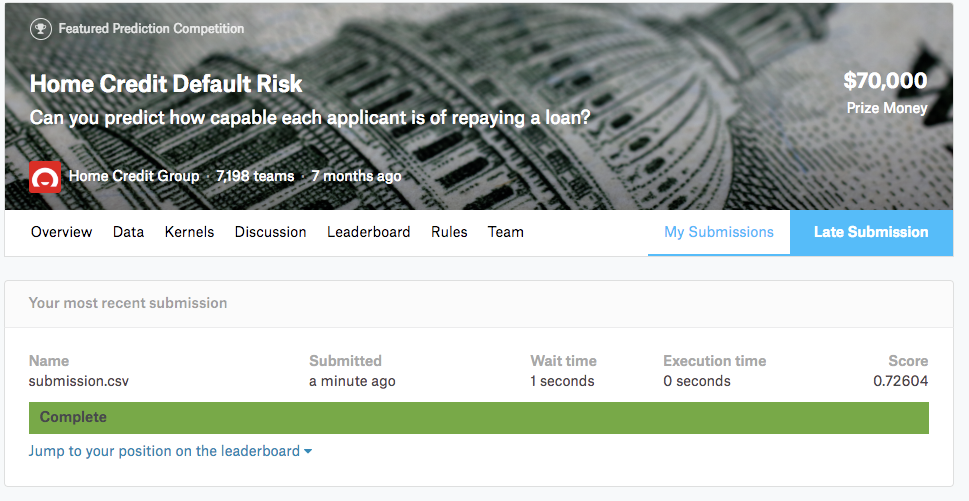

# Write-up 
For this phase of the project, you will need to submit a write-up summarizing the work you did. 
The write-up form is available on Canvas (Modules-> Module 12.1 - Course Project - Home Credit Default Risk (HCDR)-> FP Phase 2 (HCDR) : write-up form ). It has the following sections: 
## Abstract
In phase I, we did a basic EDA for all datasets along with a baseline pipeline for selected metrics. A comprehensive statistical analysis was done on both the categorical and numerical features followed by creative visual exploration of the features. Feature engineering was then done by merging the features from the different datasets to setup the final features of the baseline pipeline model.

In phase – I, our logistic regression model showed a test accuracy of 0.916 and a training AOC of 0.7441

Our ROC_AUC score for Kaggle submission was 0.73012.
## Introduction
Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

The results of the machine learning pipelines are measured by using these metrics: Mean Absolute Error (MAE), Root Mean Square Error (RMSE), Accuracy Score, Precision, Recall, Confusion Matrix, and Area Under ROC Curve (AUC).

The results of our pipelines will be analyzed and ranked. The most efficient pipeline will be submitted to the Kaggle competition for the Home Credit Default Risk (HCDR).

## EDA

Exploratory Data Analysis is valuable to this project since it allows us to get closer to the certainty that the future results will be valid, accurately interpreted, and applicable to the proposed solution.

In phase 1 for this project this step involves looking at the summary statistics for each individual table in the model and focusing on the missing data , distribution and its central tendencies such as mean, median, count, min, max and the interquartile ranges. We also checked the correlation of each variable with Target variable and amongst other variables.

We performed exploratory data analysis on categorical and numerical features and also plotted the pair-wise plots with respect to the Target variable 

## Feature Engineering and transformers
In our feature engineering process, we created a few features within the secondary tables bureau and credit card balance tables by performing certain numerical operations. After that, we aggregated the numerical columns by taking the mean of all the columns by grouping on the SK_ID_CURR column which was then merged with the main applications_train table.

We engineered these two features within the bureau table:

- Number of past loans per customer                  
- Number of types of past loans per customer                         
We also engineered the following two features in the credit card balance table                          
- Number of loans per customer                    
- Average of days past due per customer             

After the aggregation was performed followed by every individual merging of the secondary tables with the primary table, we generated the correlation of all the features with respect to the ‘TARGET’ variable and based on the absolute correlation values, we selected the top 30 features which were the final numerical features for the base pipeline. These were then merged with the categorical features and in total our baseline model consisted of 37 features ( 30 numerical and 7 categorical)
## Pipelines
Logistic regression model was used as a baseline Model. Training a logistic regression model doesn't require high computation power.
Numerical pipeline was used which included the steps of Feature Selection, Imputation and Standardization. Categorical pipeline was used which included Standardization and one-hot encoding.
Implementing Logistic Regression as a baseline model is a good starting point for classification tasks due to its easy implementation and low computational requirements. We prepared our data pipeline of Logistic Regression with default parameters (penalty = 'l2', C = 1.0, solver = 'lbfgs', tol = 1e-4).

Here is the high-level workflow for the model pipeline followed by detailed steps:

1. Downloaded data and performed data pre-processing tasks (joining primary and secondary datasets, transformation)
2. Created a data pipeline with highly correlated numerical and categorical features.
3. Imputed missing numerical attribute with mean values and categorical values with the ‘missing’ word
4. Applied FeatureUnion to combine both Numerical and Categorical features.
5. Created model with data pipeline and baseline model to fit training dataset
6. Evaluated the model using accuracy score, AUC score, RMSE and MAE for train, validation and test datasets. Recorded the results in a dataframe.     


## Discussion & Experimental results
The baseline model with Logistic regression gave a test accuracy of 91.6 % and a test AUC score of 74.41%. Our Kaggle submission gave the ROC Score of 73.012%  

## Conclusion
In HCDR project, we are using Home Credit’s data to better predict repayment of a loan by a customer with little/no credit history, has a real-world impact. Providing credits to people who are credible and in need helps upscale people livelihood.

In this phase of our project we have exhibited a environment to ingest Home Credit’s data, analyze the dataset features, transform and engineer the best parameters, and test machine learning algorithms. Our workflow will allow us to obtain a tuned algorithm with a statistically significant increase in performance compared to untuned logistic regression.


## Kaggle Submission
Below is the screenshot of our Kaggle submission

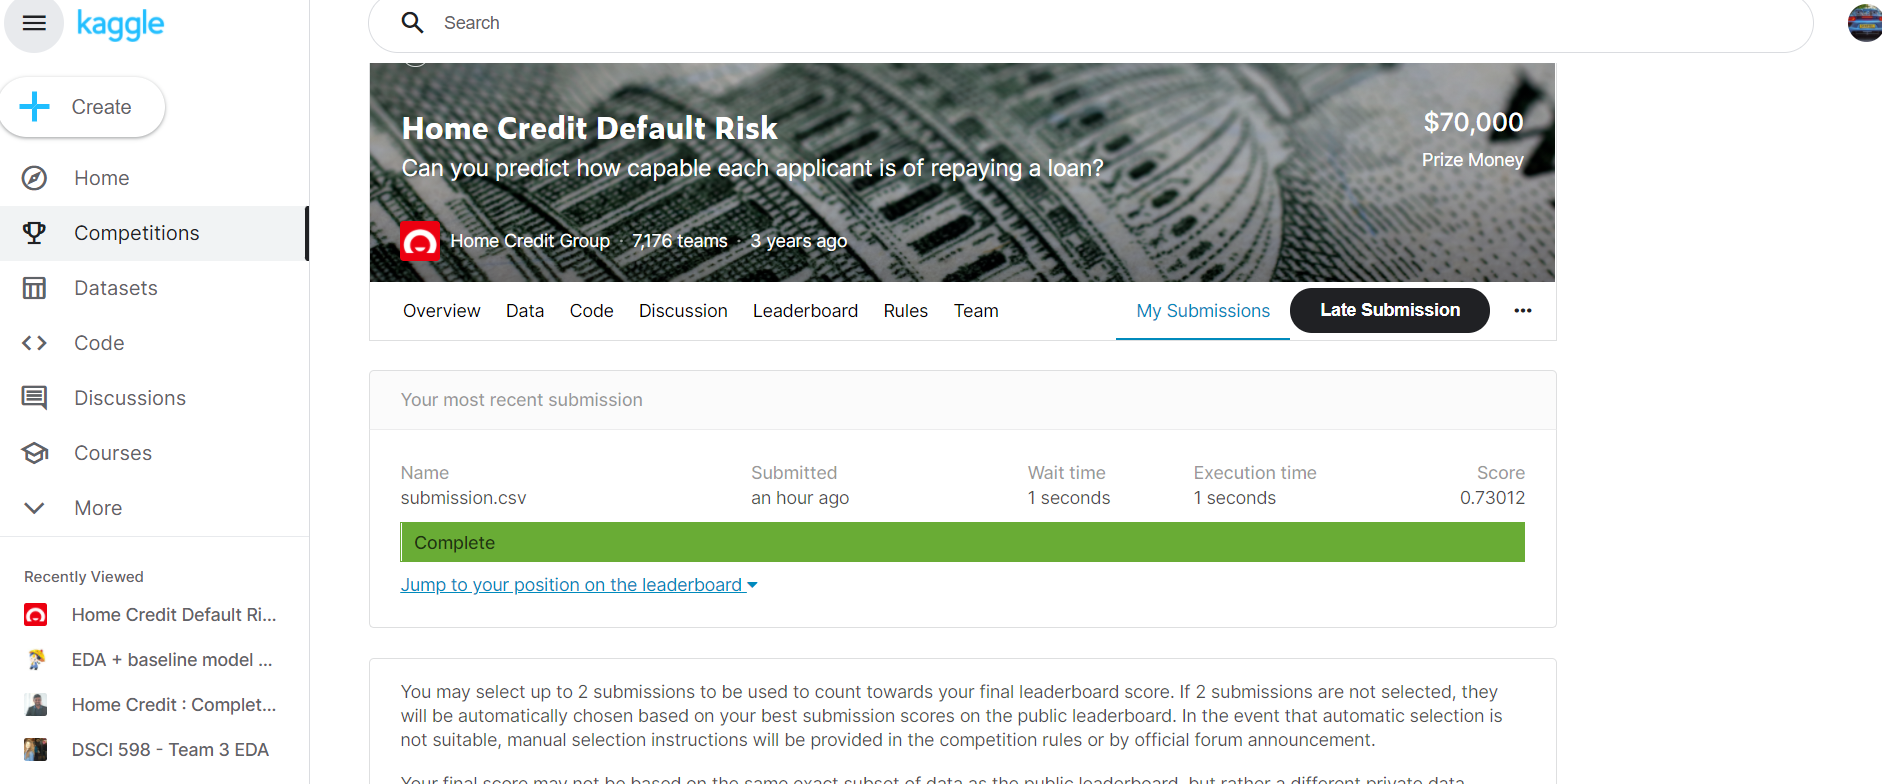

# References



- https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction/notebook
- https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html
- https://coderzcolumn.com/tutorials/data-science/missingno-visualize-missing-data-in-python
- https://juhiramzai.medium.com/introduction-to-credit-risk-modeling-e589d6914f57

#  TODO: Predicting Loan Repayment with Automated Feature Engineering in Featuretools

Read the following:
* feature engineering via Featuretools library: 
  * https://github.com/Featuretools/predict-loan-repayment/blob/master/Automated%20Loan%20Repayment.ipynb
* https://www.analyticsvidhya.com/blog/2018/08/guide-automated-feature-engineering-featuretools-python/
* feature engineering paper: https://dai.lids.mit.edu/wp-content/uploads/2017/10/DSAA_DSM_2015.pdf
* https://www.analyticsvidhya.com/blog/2017/08/catboost-automated-categorical-data/